In [16]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score
from sklearn.svm import SVC

bmw_dataset = pd.read_csv("BMW_Car_Sales_Classification.csv")
bmw_dataset.head()

Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0    151748.0    98740.0        8300.0                 High  
1    121671.0    79219.0        3428.0                  Low  
2     10991.0   113265.0        6994.0                  Low  
3     27255.0    60971.0        4047.0                  Low  
4    122131.0    49898.0        3080.0                  Low

Step 1: Exploring The Data

In [2]:
print(bmw_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15670 entries, 0 to 15669
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 15670 non-null  object 
 1   Year                  15670 non-null  int64  
 2   Region                15670 non-null  object 
 3   Color                 15670 non-null  object 
 4   Fuel_Type             15670 non-null  object 
 5   Transmission          15669 non-null  object 
 6   Engine_Size_L         15669 non-null  float64
 7   Mileage_KM            15669 non-null  float64
 8   Price_USD             15669 non-null  float64
 9   Sales_Volume          15669 non-null  float64
 10  Sales_Classification  15669 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.3+ MB
None


In [3]:
bmw_dataset.shape

(15670, 11)

In [4]:
bmw_dataset.describe()

Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  15670.000000   15669.000000   15669.000000   15669.000000  15669.000000
mean    2016.987747       3.239735  101137.438062   75093.396324   5117.966750
std        4.323754       1.010074   57925.416252   26211.059537   2868.485601
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50742.000000   52104.000000   2628.000000
50%     2017.000000       3.200000  101736.000000   75245.000000   5161.000000
75%     2021.000000       4.100000  151732.000000   97877.000000   7610.000000
max     2024.000000       5.000000  199996.000000  119997.000000   9999.000000

In [5]:
bmw_dataset.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [6]:
bmw_dataset.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            1
Engine_Size_L           1
Mileage_KM              1
Price_USD               1
Sales_Volume            1
Sales_Classification    1
dtype: int64

In [7]:
bmw_dataset.dropna(inplace = True)

In [8]:
print(bmw_dataset['Fuel_Type'].value_counts())
print(bmw_dataset['Region'].value_counts())
print(bmw_dataset['Color'].value_counts())
print(bmw_dataset['Transmission'].value_counts())
print(bmw_dataset['Model'].value_counts())

Fuel_Type
Hybrid      3985
Electric    3969
Petrol      3907
Diesel      3808
Name: count, dtype: int64
Region
North America    2654
Asia             2636
Middle East      2610
Africa           2604
Europe           2588
South America    2577
Name: count, dtype: int64
Color
Black     2638
Silver    2617
Grey      2616
White     2615
Red       2612
Blue      2571
Name: count, dtype: int64
Transmission
Manual       7955
Automatic    7714
Name: count, dtype: int64
Model
7 Series    1495
X1          1493
3 Series    1466
i3          1444
5 Series    1443
i8          1443
X3          1402
X6          1393
M5          1390
X5          1366
M3          1334
Name: count, dtype: int64


Step 2: EDA

simple count charts

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10332\1301628730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=bmw_dataset, palette='pastel')


<Axes: xlabel='Sales_Classification', ylabel='count'>

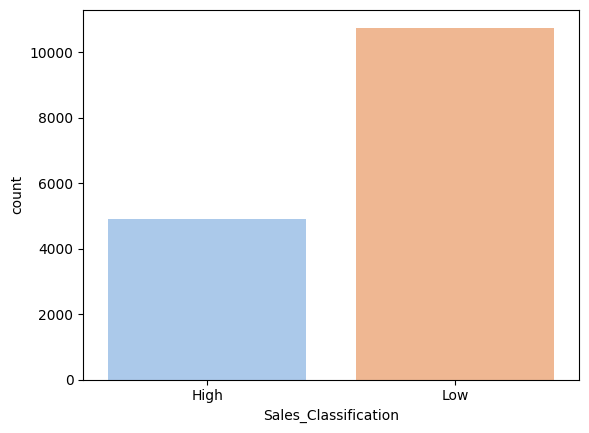

In [9]:
target = 'Sales_Classification'
sns.countplot(x=target, data=bmw_dataset, palette='pastel')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18784\1966259403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=bmw_dataset, order=bmw_dataset[col].value_counts().index, palette='Set3')


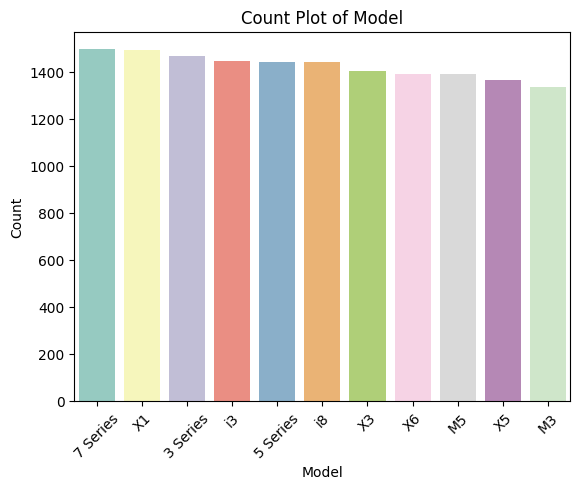

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18784\1966259403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=bmw_dataset, order=bmw_dataset[col].value_counts().index, palette='Set3')


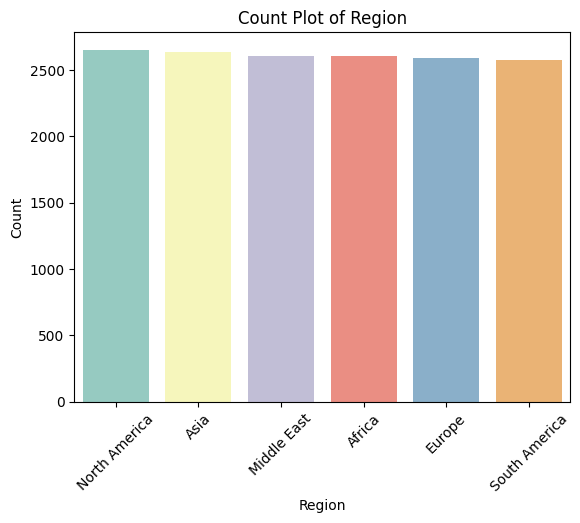

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18784\1966259403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=bmw_dataset, order=bmw_dataset[col].value_counts().index, palette='Set3')


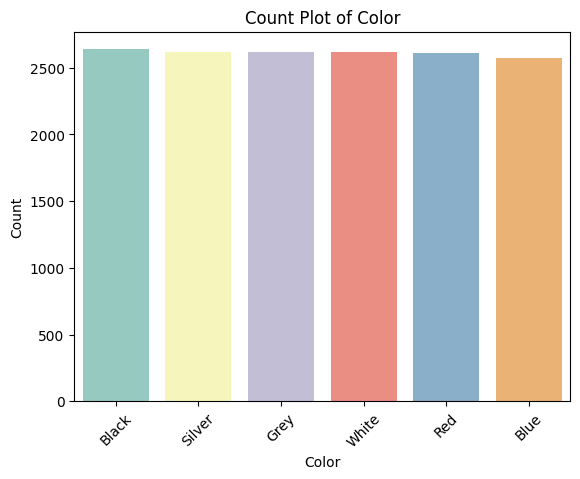

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18784\1966259403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=bmw_dataset, order=bmw_dataset[col].value_counts().index, palette='Set3')


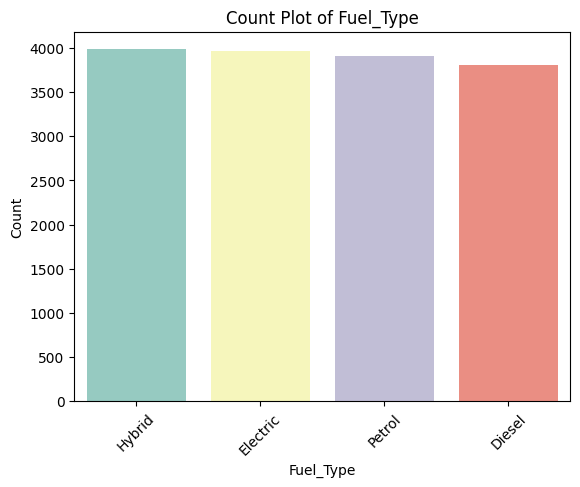

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18784\1966259403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=bmw_dataset, order=bmw_dataset[col].value_counts().index, palette='Set3')


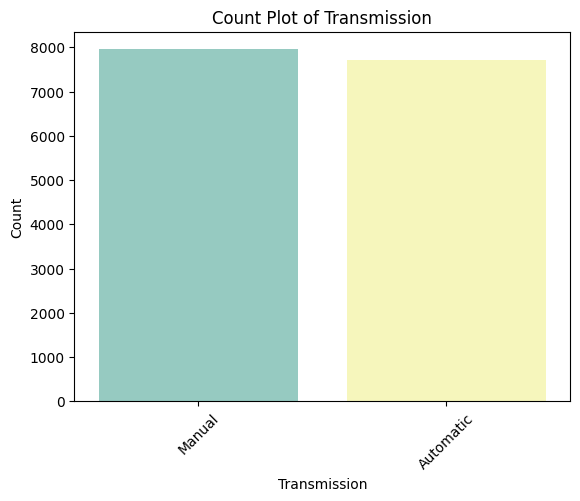

In [14]:
cat_cols = bmw_dataset.select_dtypes(include='object').columns.drop(target, errors='ignore')
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=bmw_dataset, order=bmw_dataset[col].value_counts().index, palette='Set3')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

simple correlation heatmap for numerical columns


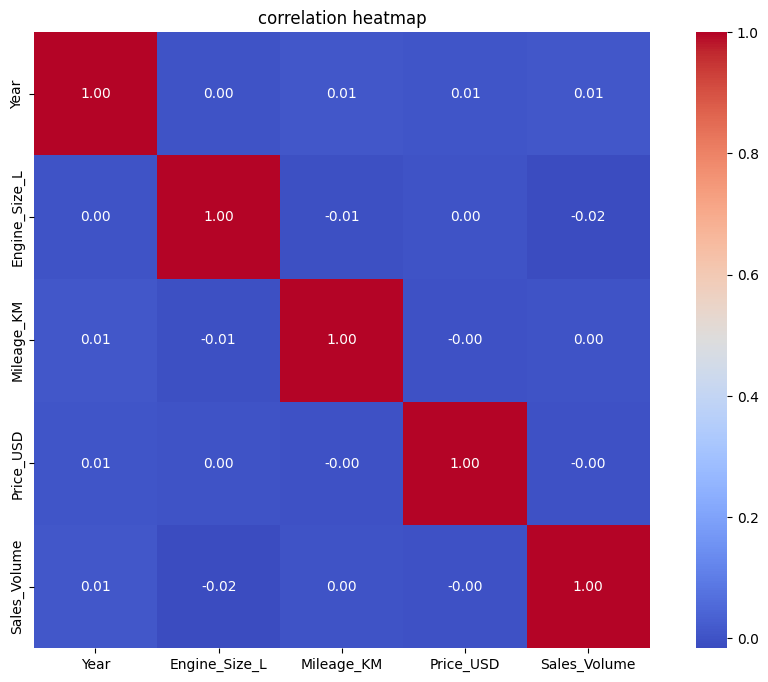

In [12]:
if len(num_cols)>= 2 : 
    plt.figure(figsize=(12,8))
    corr = bmw_dataset[num_cols].corr()
    sns.heatmap(corr, annot=True , cmap='coolwarm', fmt = '.2f', square = True)
    plt.title('correlation heatmap')
    plt.show()

In [3]:
df2 = bmw_dataset
df2['Sales_Classification'] = df2['Sales_Classification'].replace(to_replace='High', value=1)
df2['Sales_Classification'] = df2['Sales_Classification'].replace(to_replace='Low',  value=0)
df_dummies = pd.get_dummies(df2)
df_dummies.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1848\3501720782.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Sales_Classification'] = df2['Sales_Classification'].replace(to_replace='Low',  value=0)


Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
0  2016            3.5    151748.0    98740.0        8300.0   
1  2013            1.6    121671.0    79219.0        3428.0   
2  2022            4.5     10991.0   113265.0        6994.0   
3  2024            1.7     27255.0    60971.0        4047.0   
4  2020            2.1    122131.0    49898.0        3080.0   

   Sales_Classification  Model_3 Series  Model_5 Series  Model_7 Series  \
0                   1.0           False            True           False   
1                   0.0           False           False           False   
2                   0.0           False            True           False   
3                   0.0           False           False           False   
4                   0.0           False           False            True   

   Model_M3  ...  Color_Red  Color_Silver  Color_White  Fuel_Type_D  \
0     False  ...       True         False        False        False   
1     False  ...       True         False        False        False   
2     False  ...      False         False        False        False   
3     False  ...      False         False        False        False   
4     False  ...      False         False        False        False   

   Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Hybrid  Fuel_Type_Petrol  \
0             False               False             False              True   
1             False               False              True             False   
2             False               False             False              True   
3             False               False             False              True   
4              True               False             False             False   

   Transmission_Automatic  Transmission_Manual  
0                   False                 True  
1                    True                False  
2                    True                False  
3                    True                False  
4                   False                 True  

[5 rows x 36 columns]

correlation on sales classification

<Axes: >

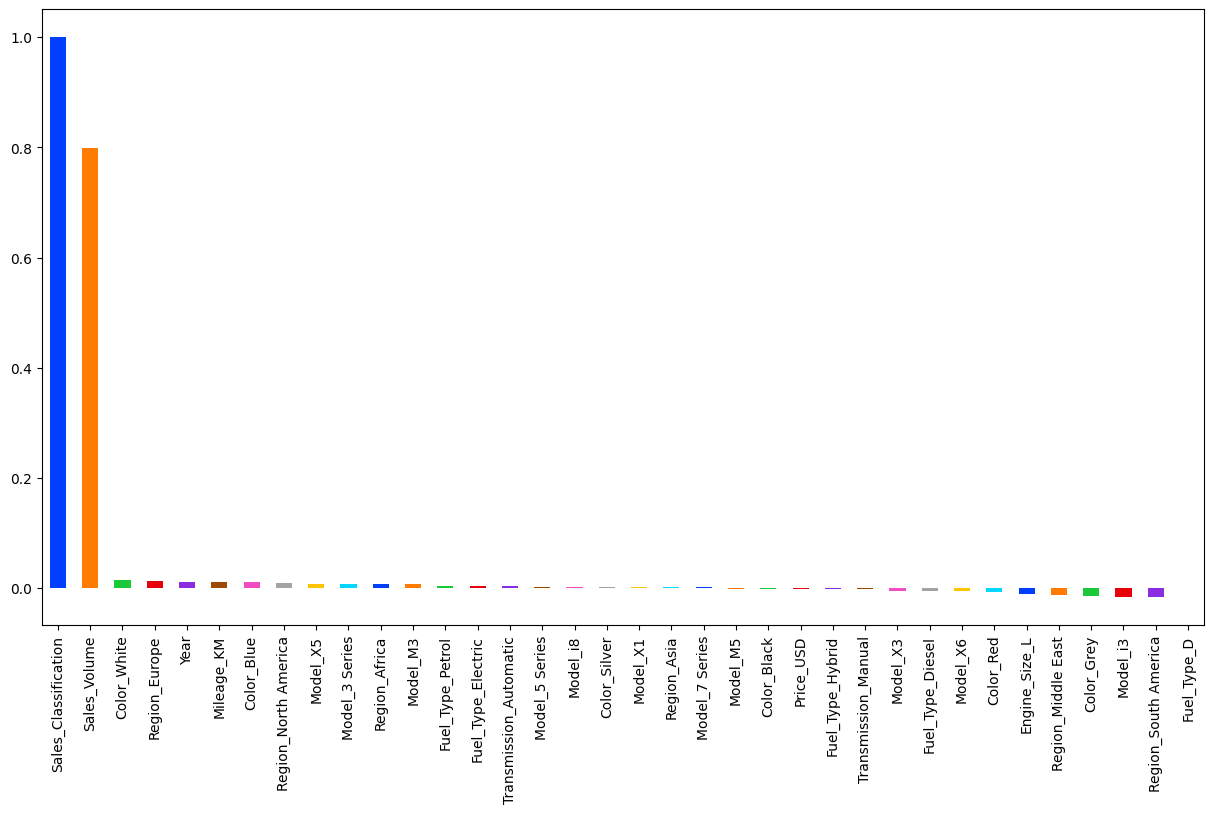

In [4]:
plt.figure(figsize=(15,8))
correlations = df_dummies.corr()['Sales_Classification'].sort_values(ascending=False)
correlations.plot(kind='bar' , color = sns.color_palette('bright', len(correlations)))


visualize if a larger engine size (>3.0 L) has a noticeable impact on a car model's sales classification within the Asian market

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


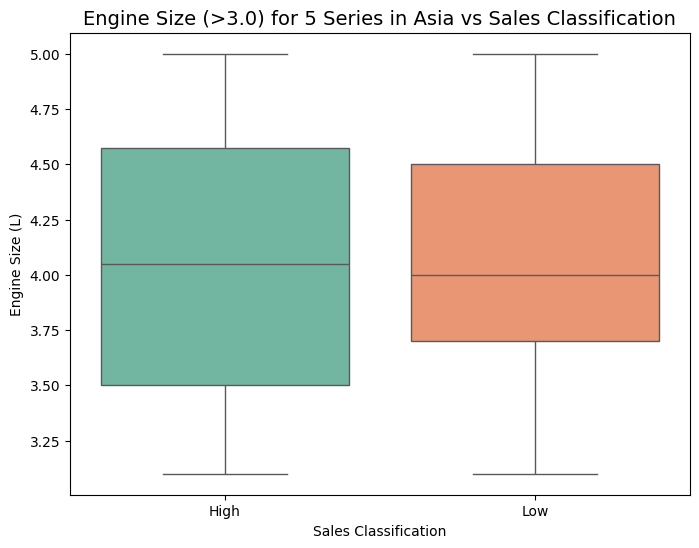

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


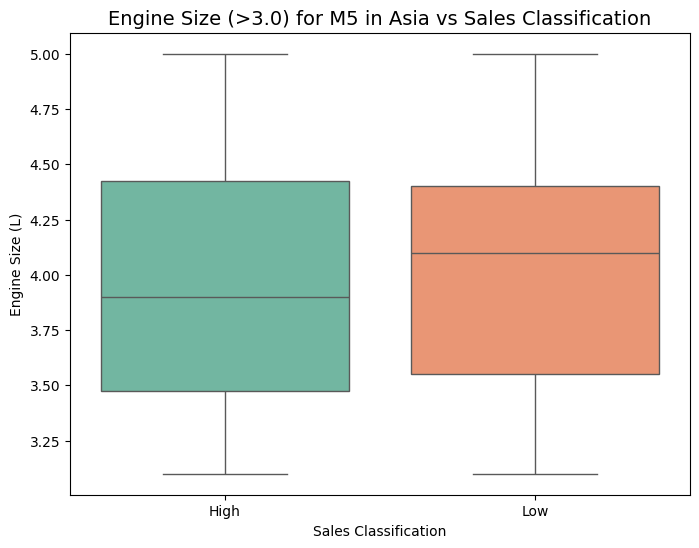

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


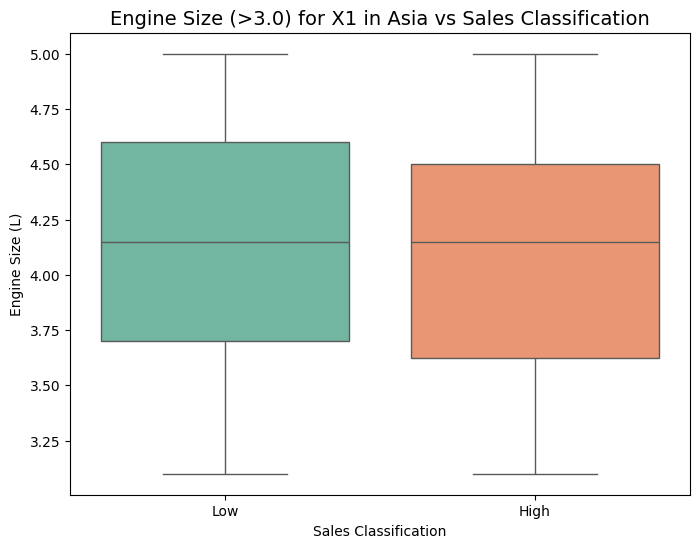

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


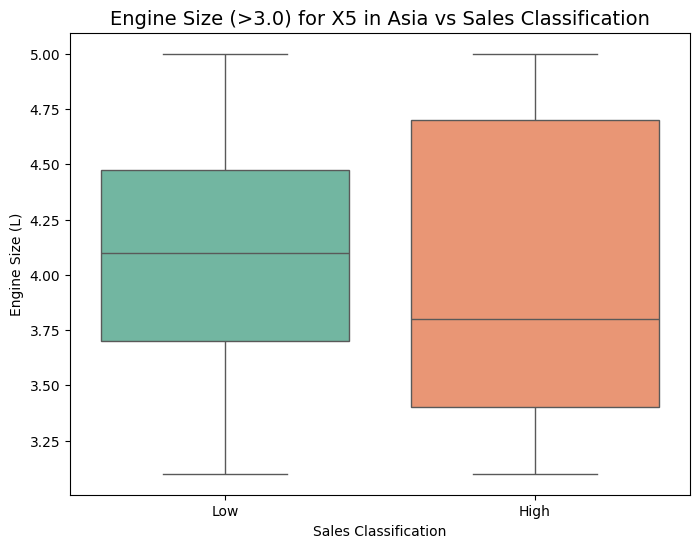

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


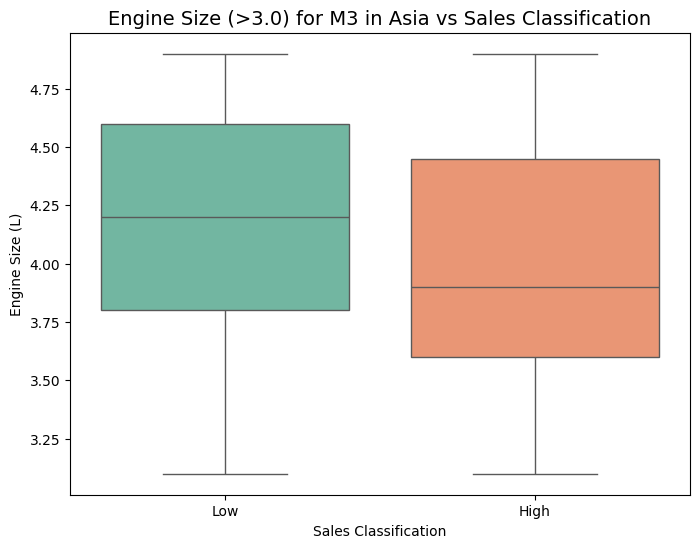

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


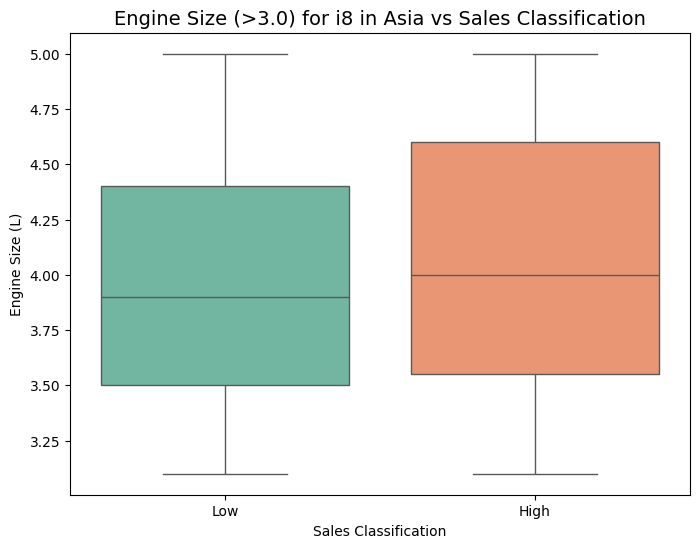

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


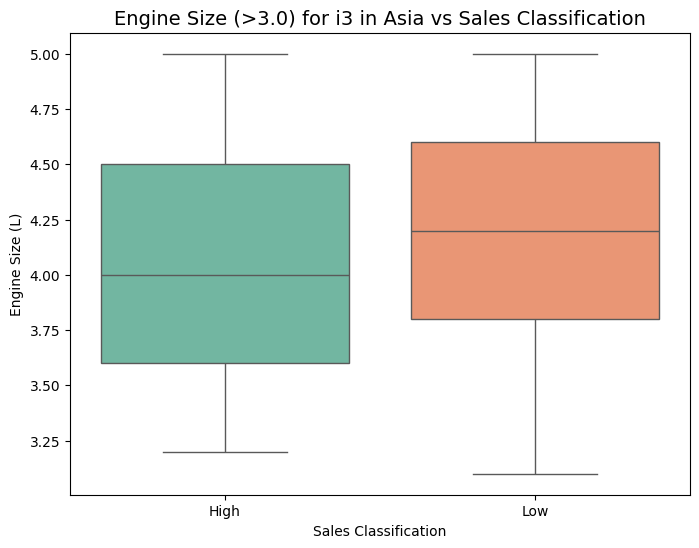

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


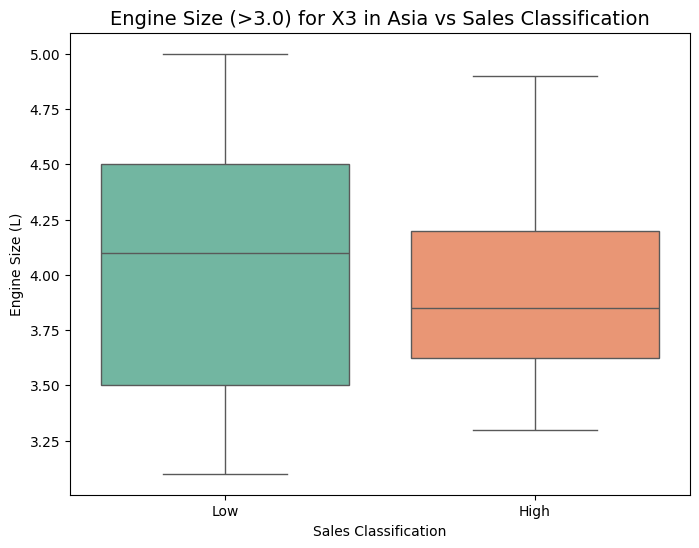

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


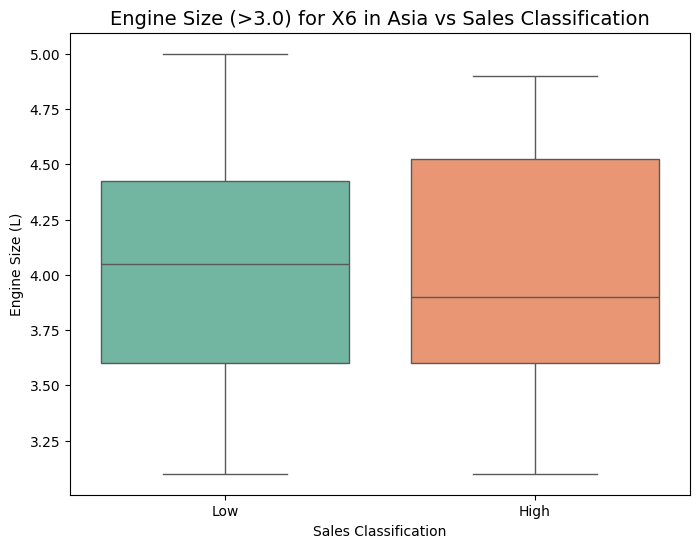

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


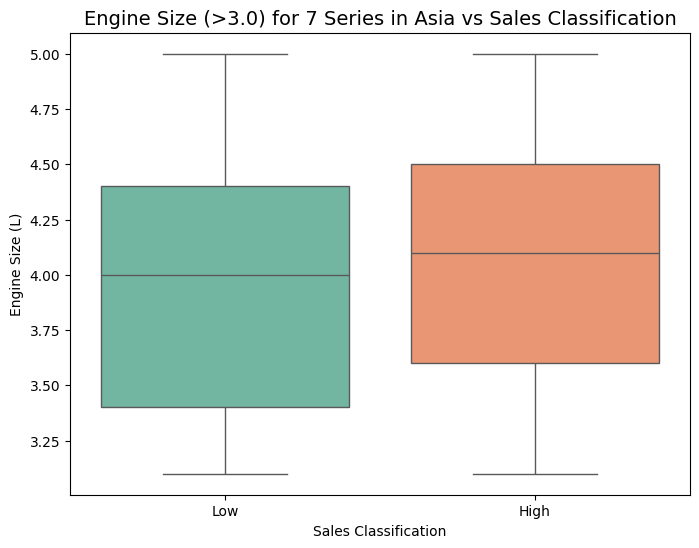

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


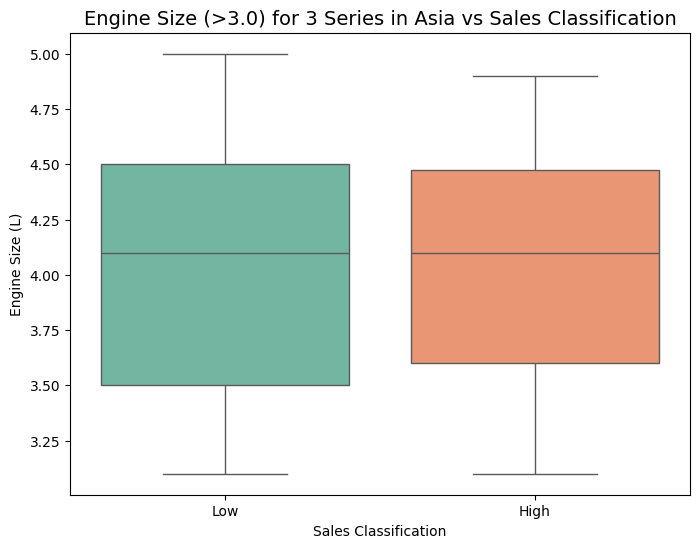

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


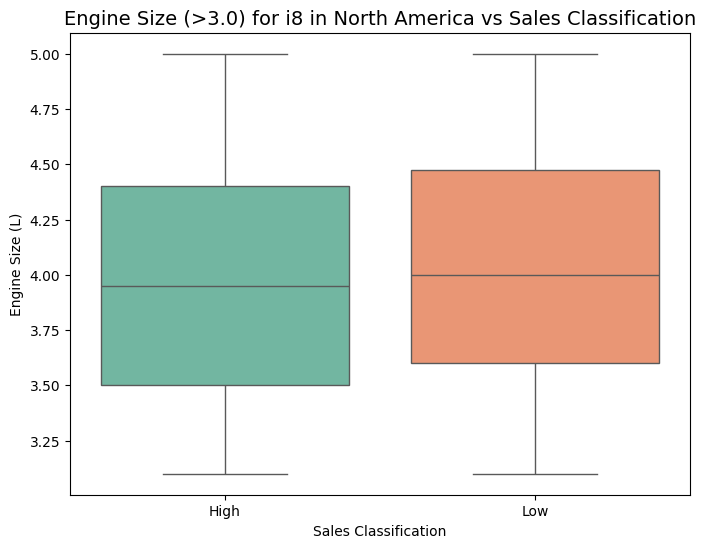

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


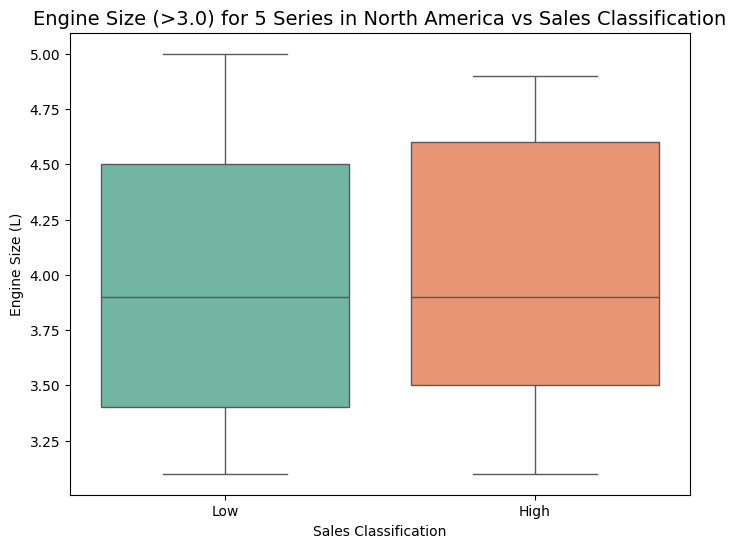

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


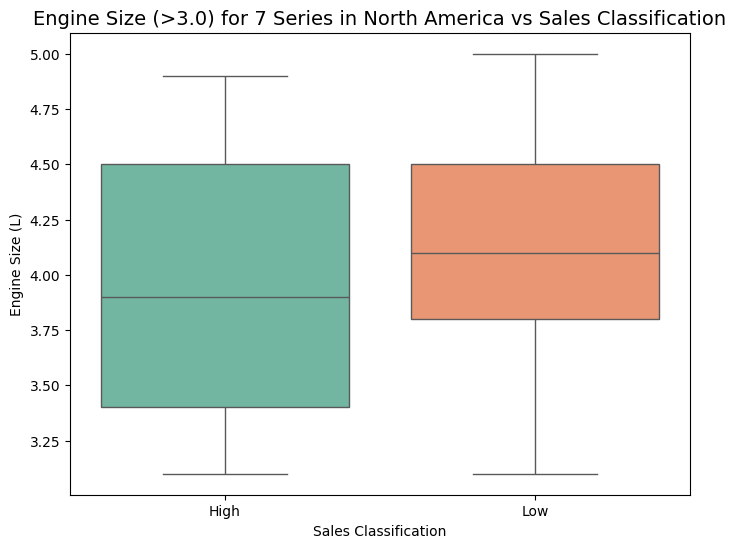

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


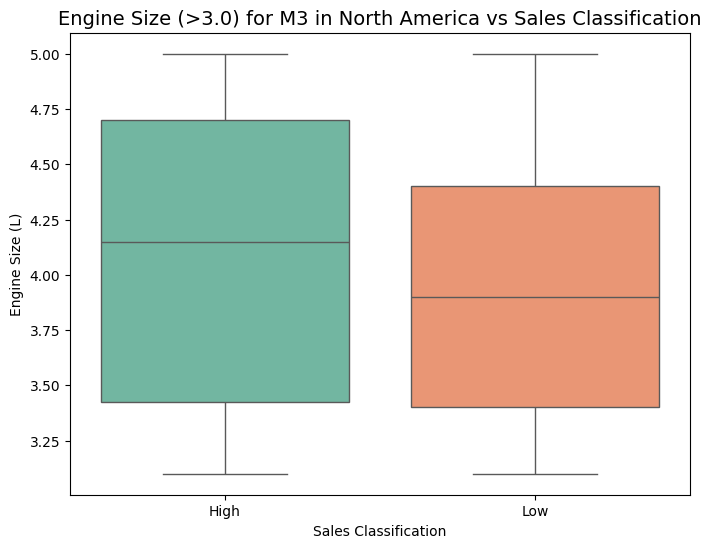

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


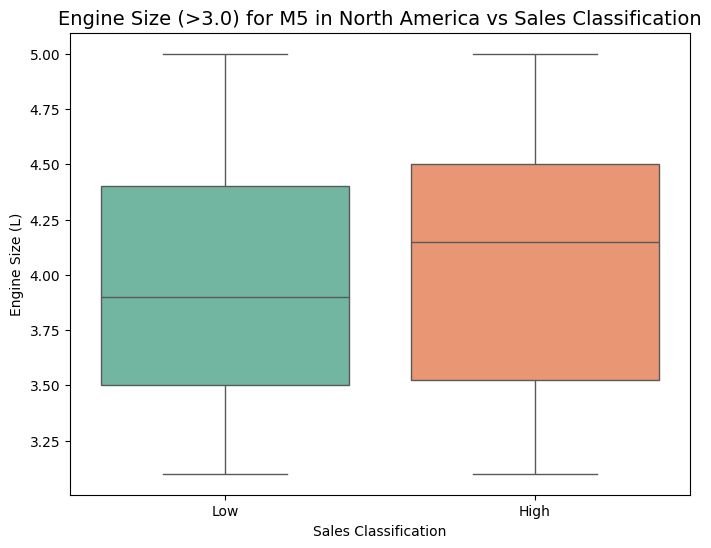

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


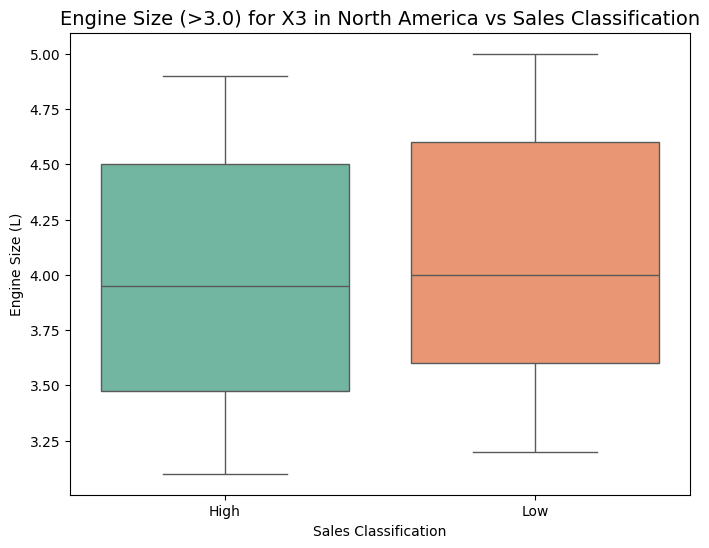

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


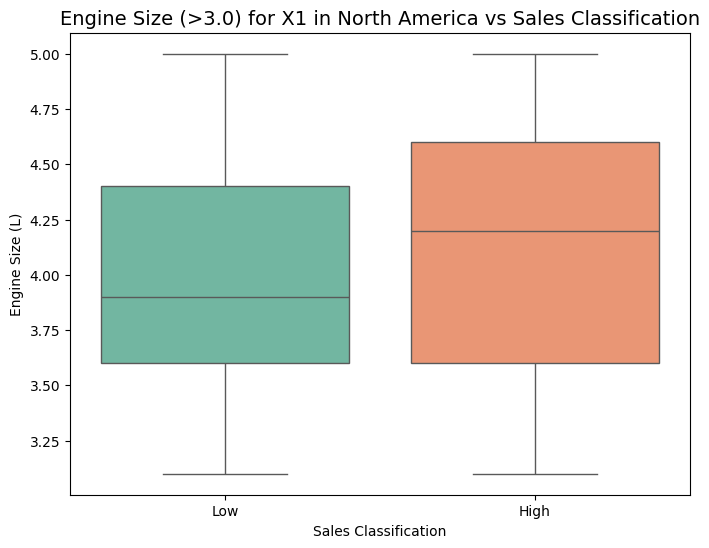

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


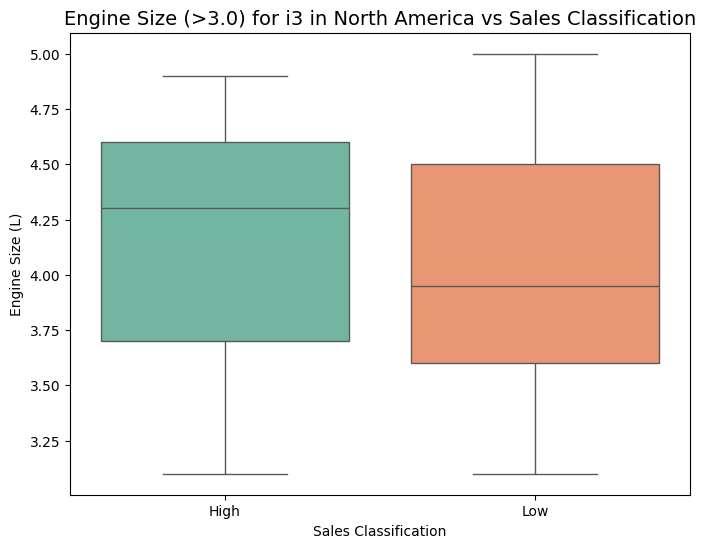

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


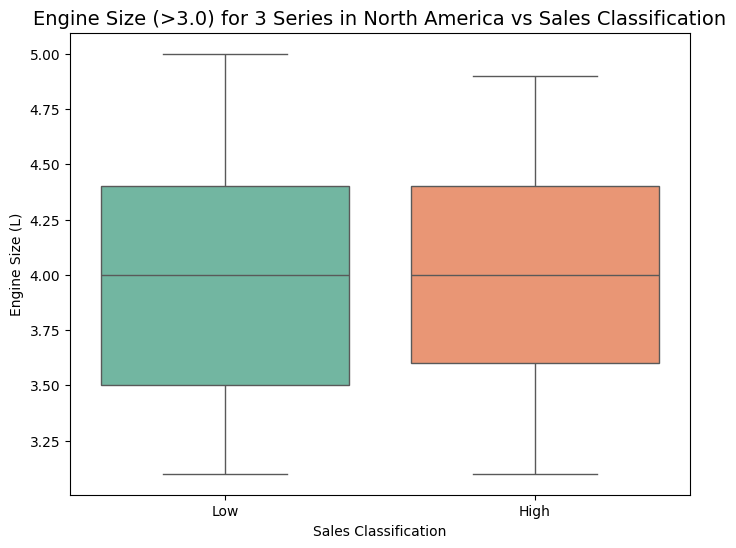

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


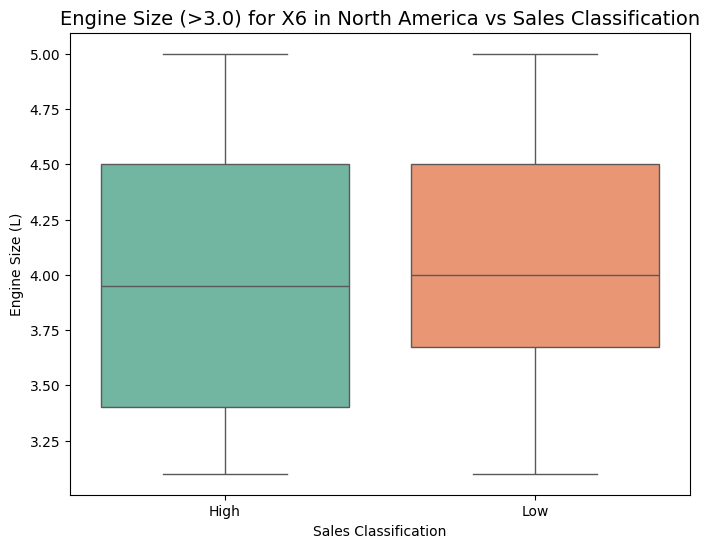

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


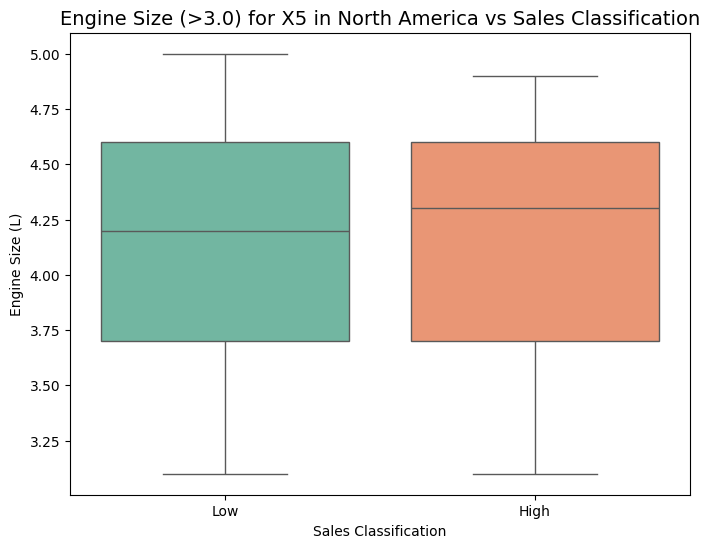

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


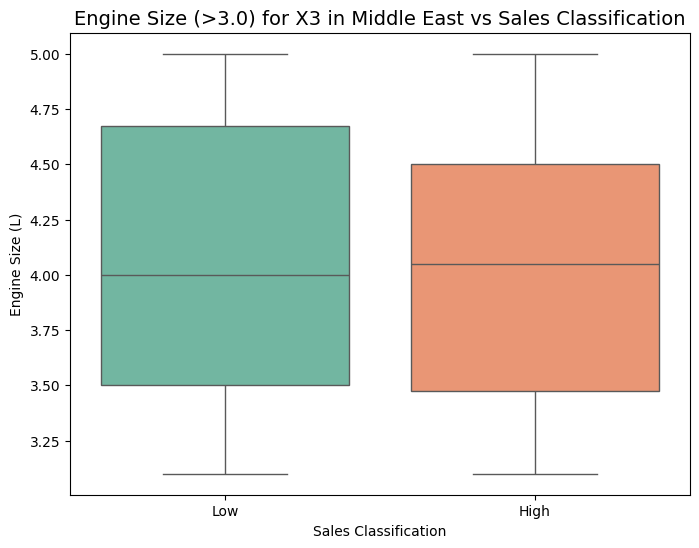

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


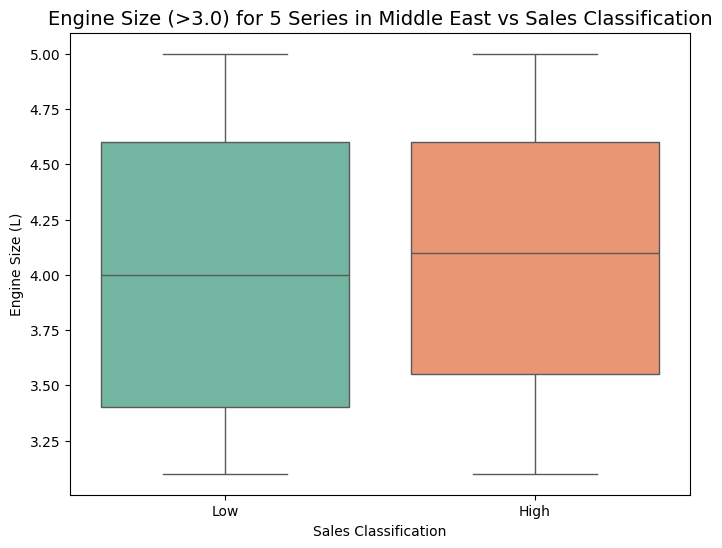

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


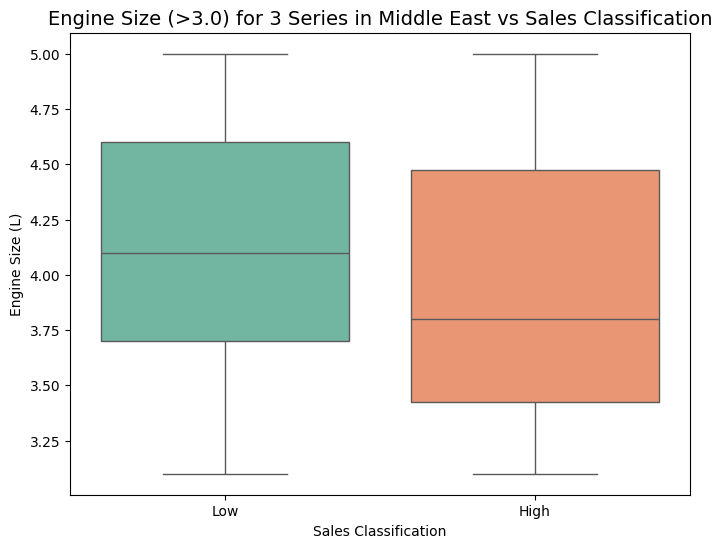

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


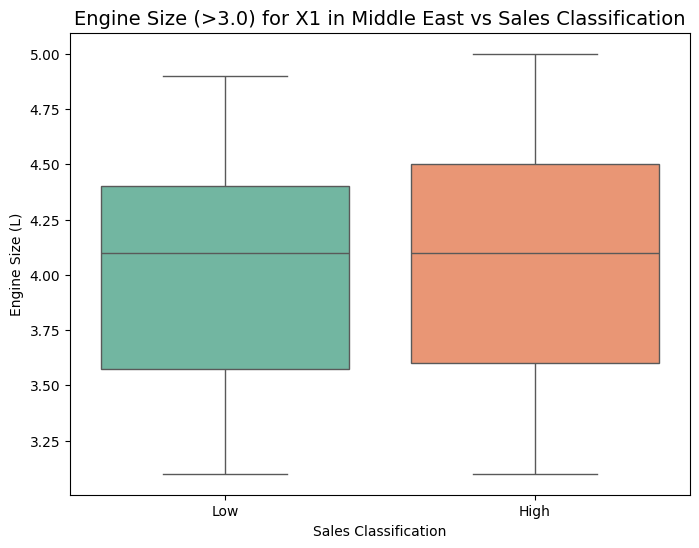

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


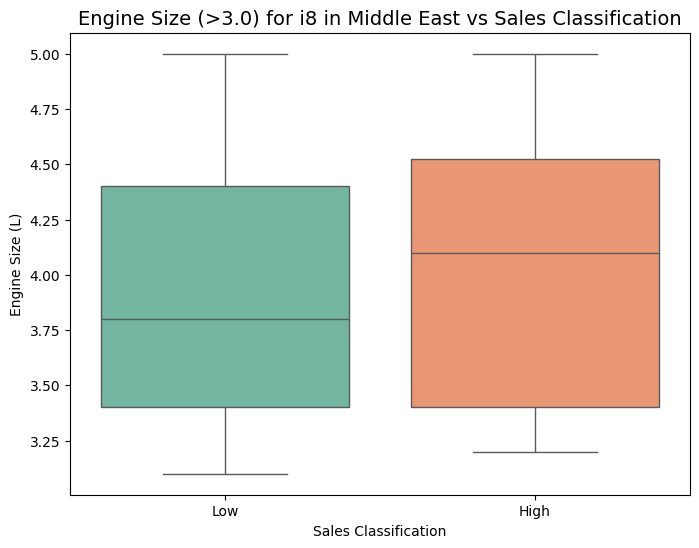

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


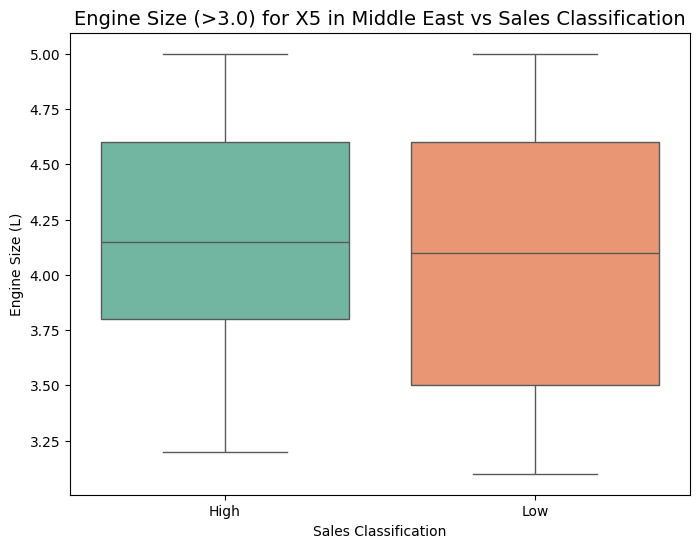

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


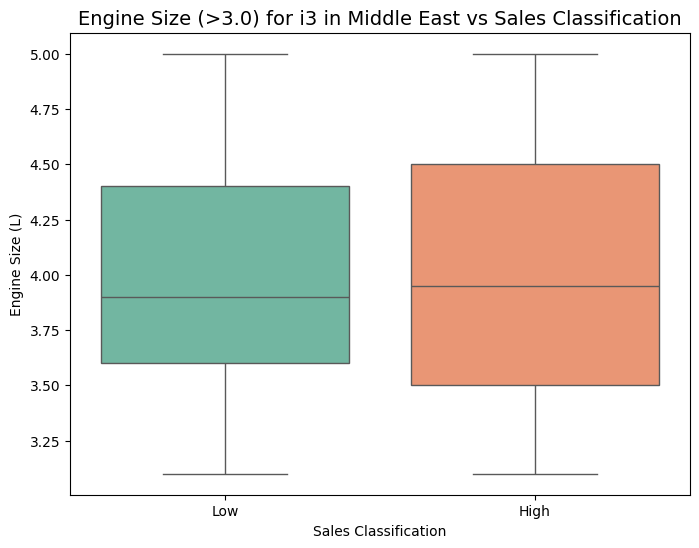

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


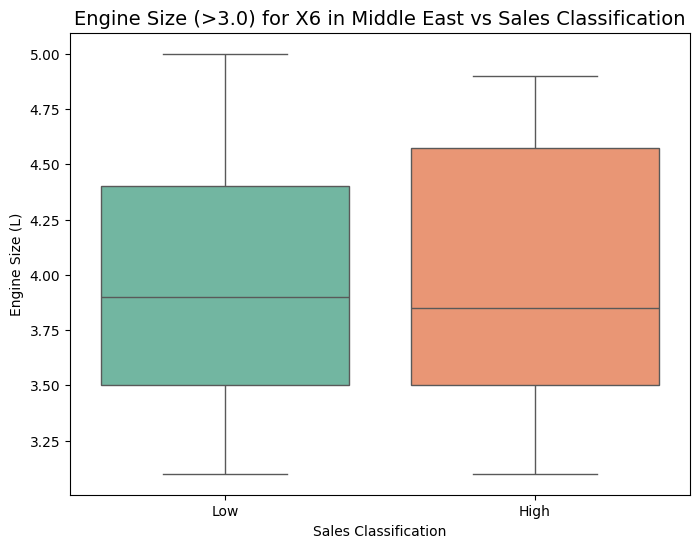

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


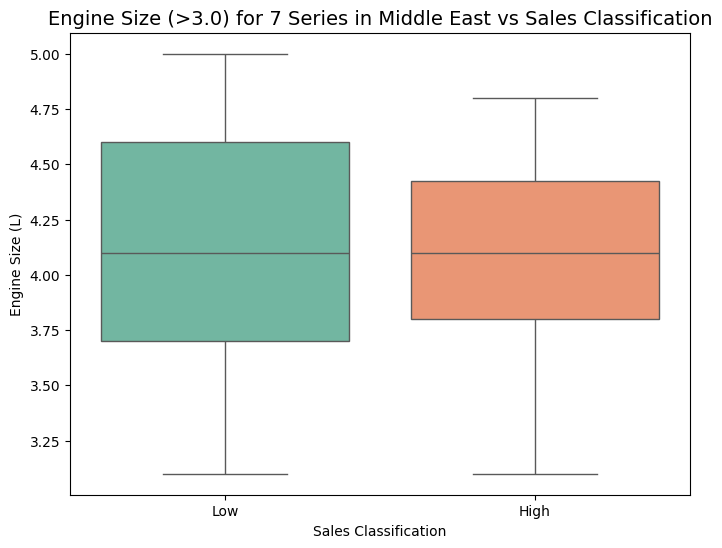

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


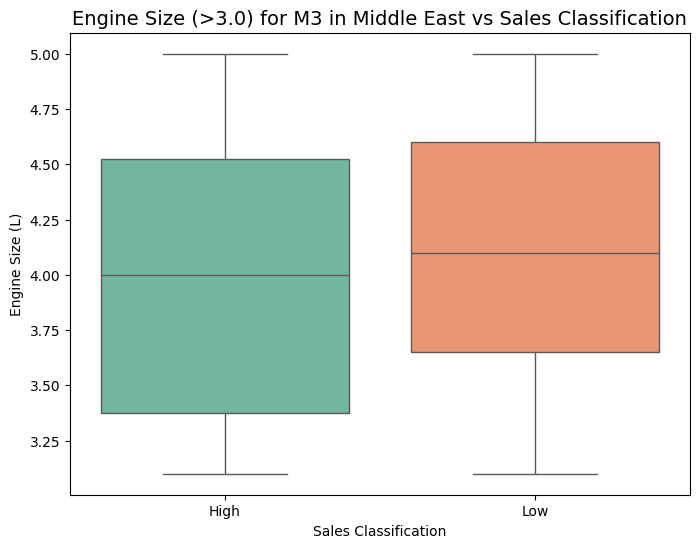

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


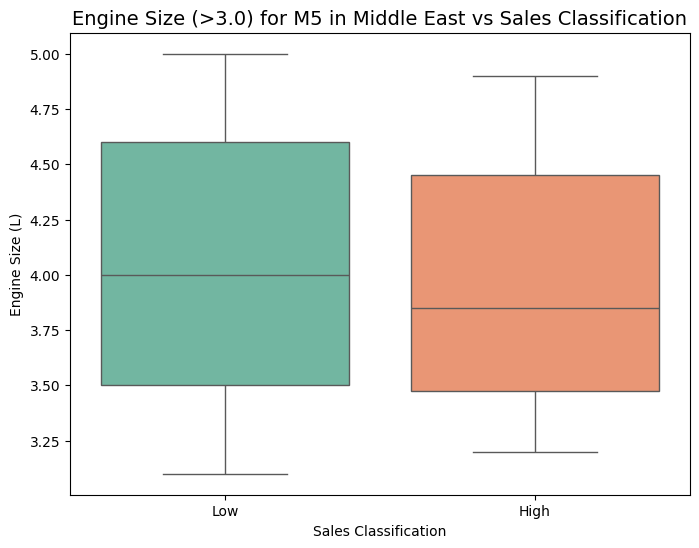

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


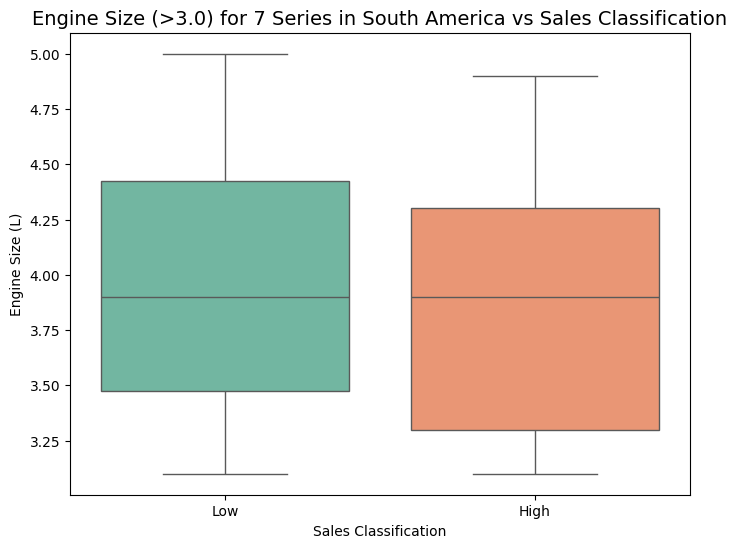

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


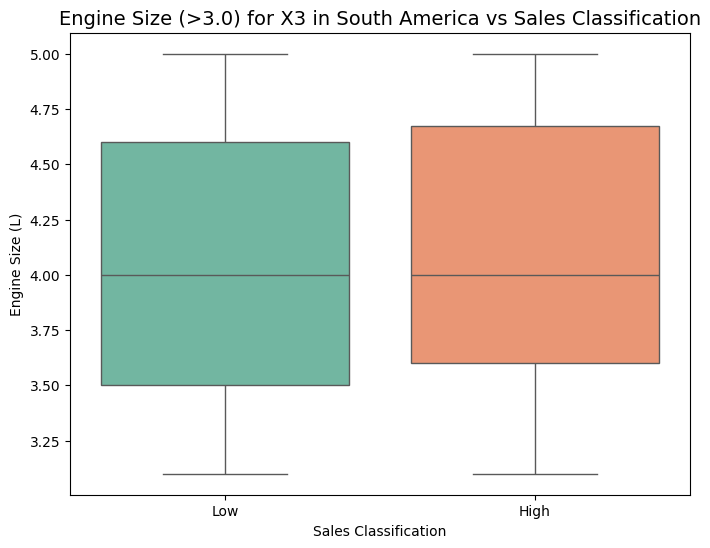

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


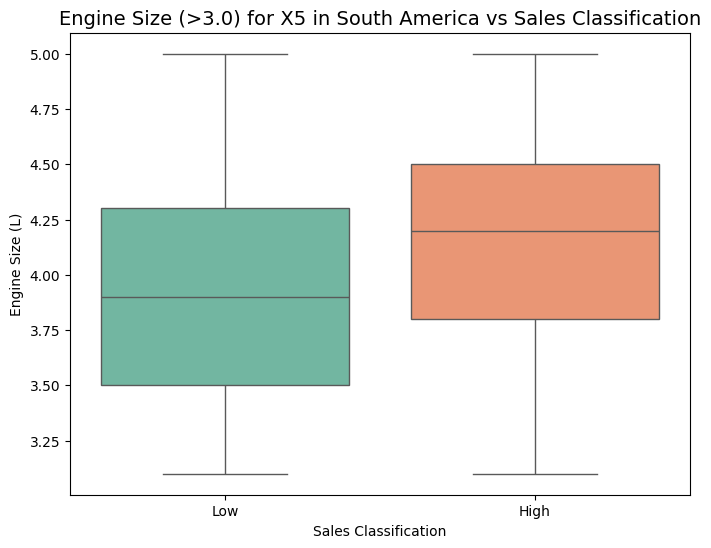

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


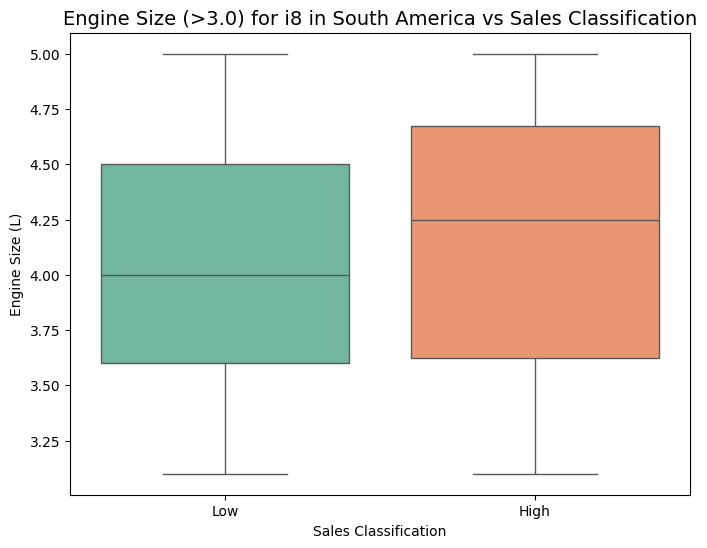

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


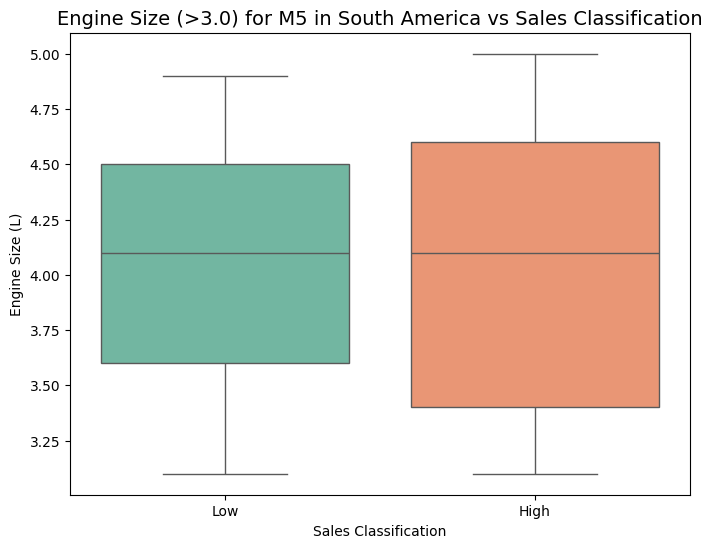

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


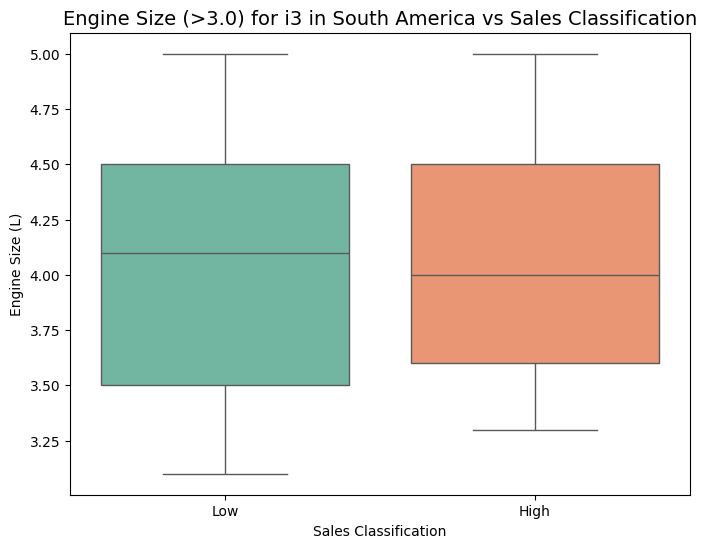

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


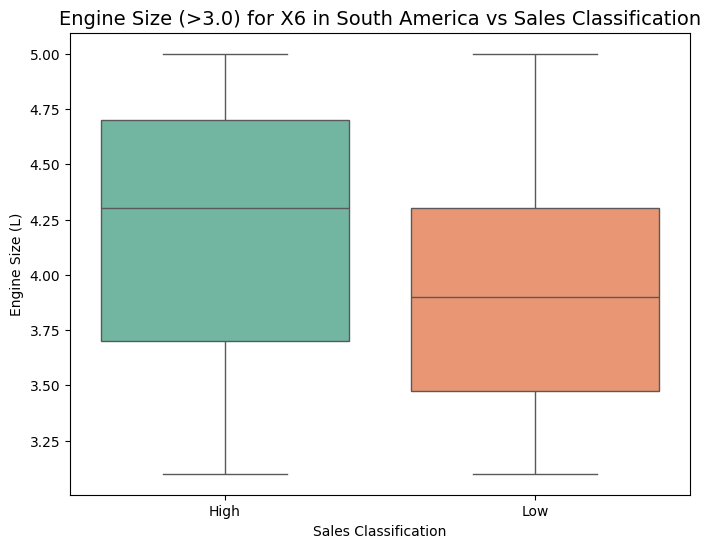

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


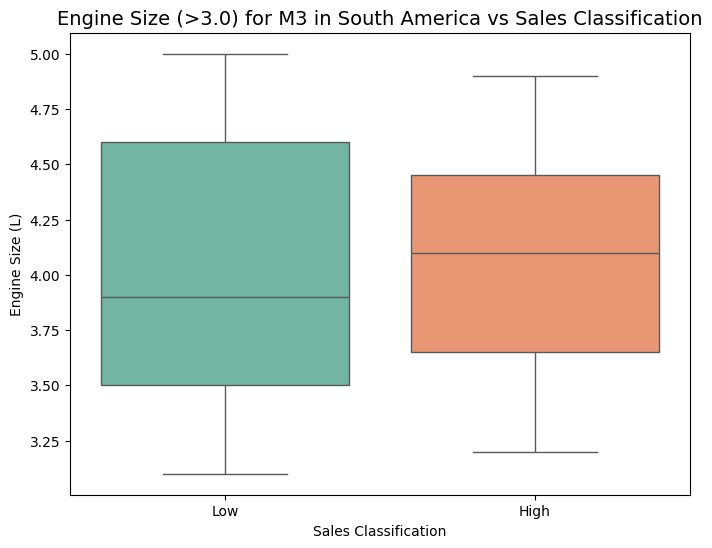

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


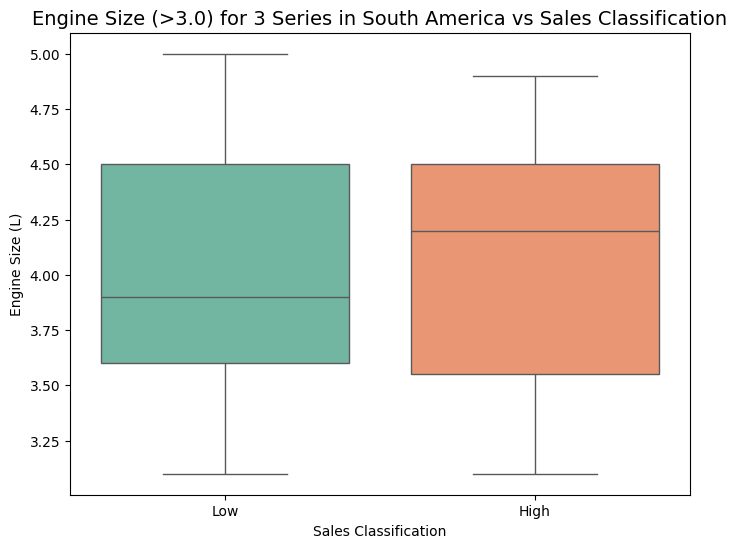

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


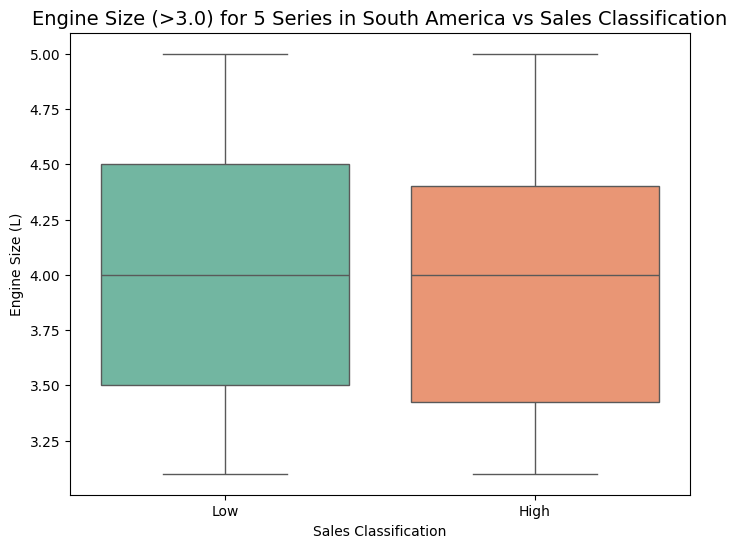

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


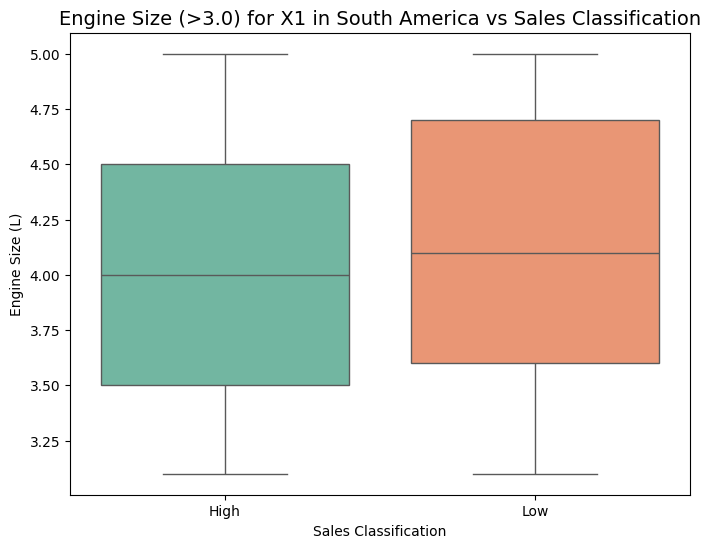

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


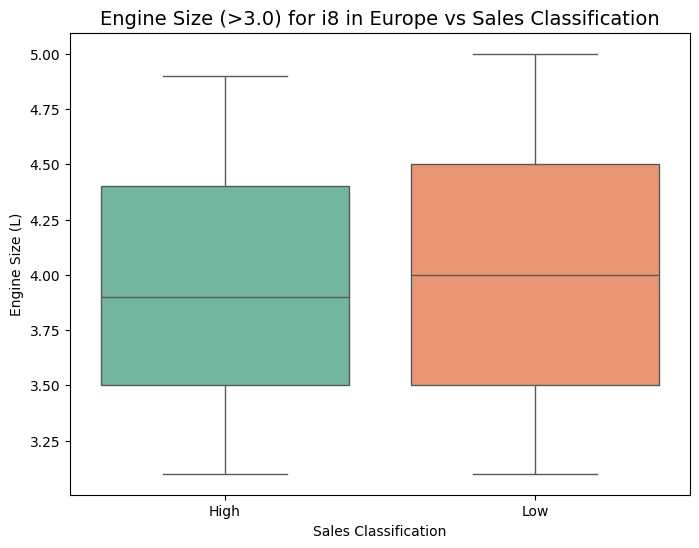

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


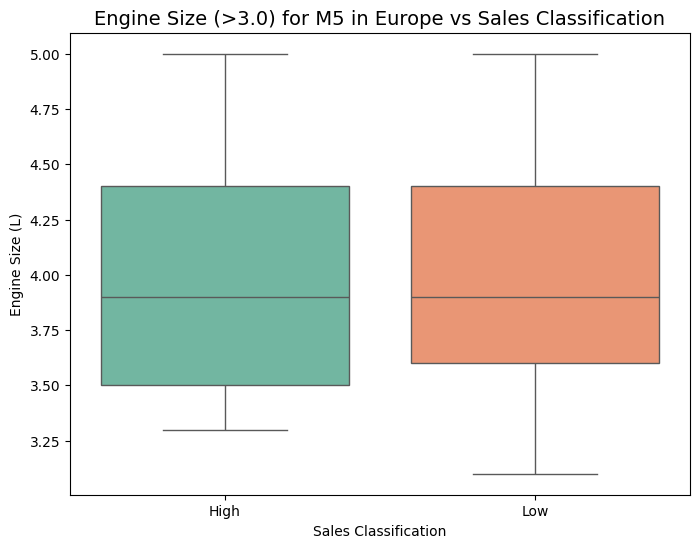

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


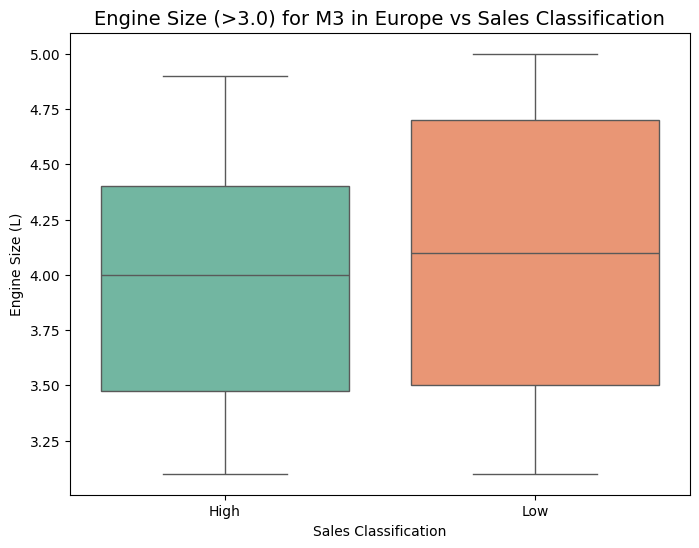

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


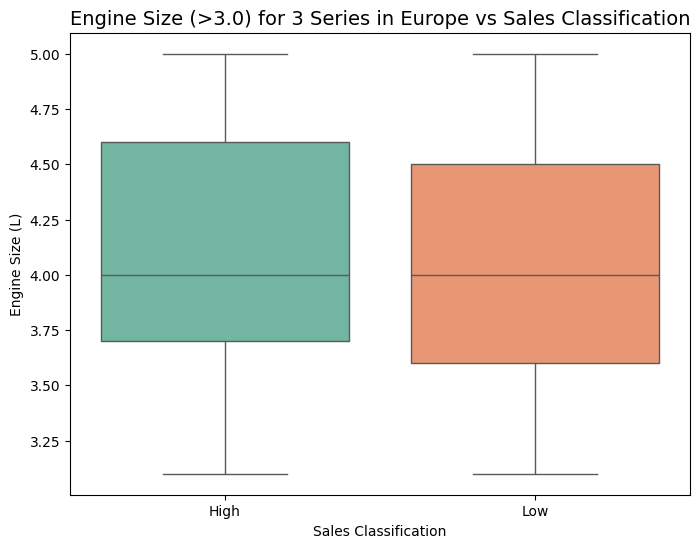

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


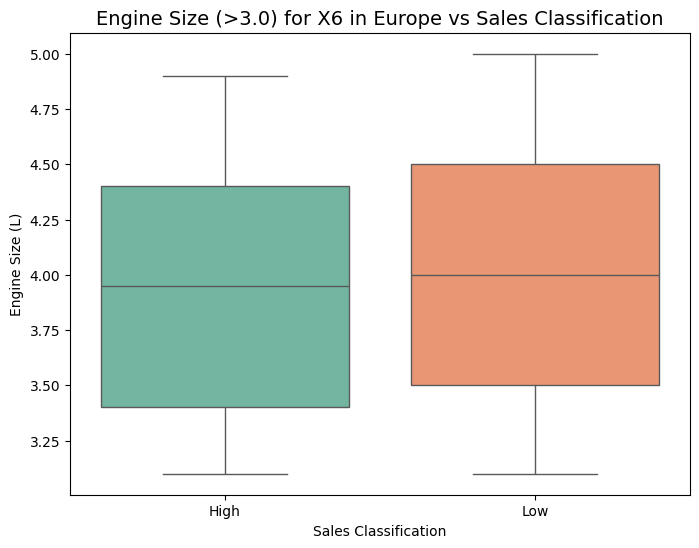

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


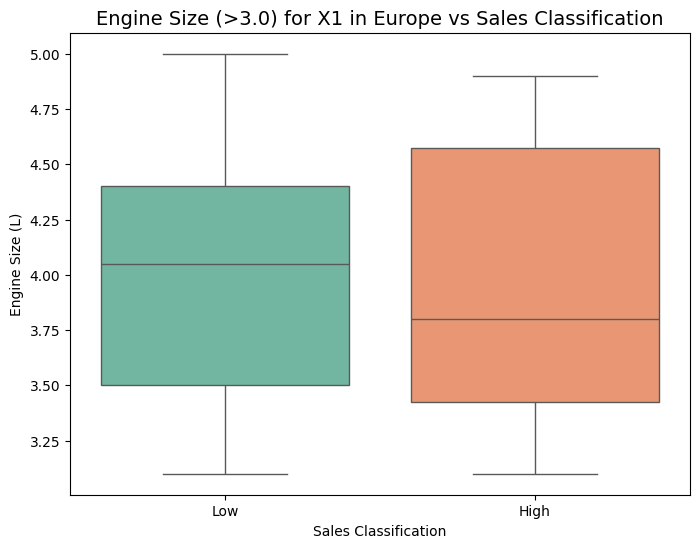

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


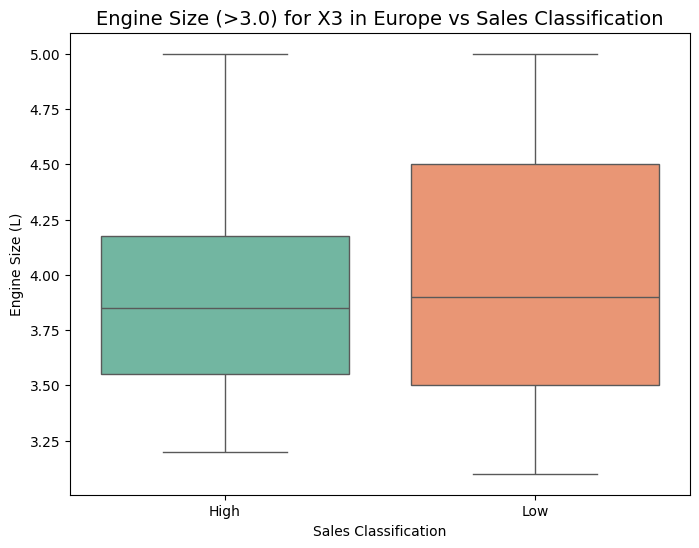

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


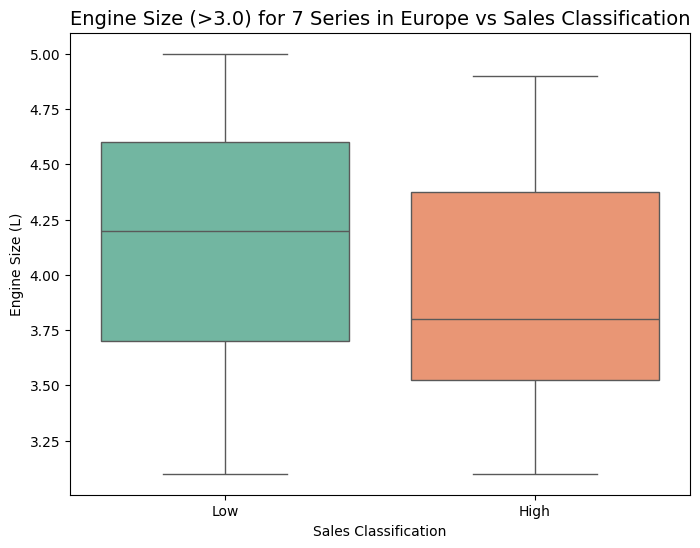

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


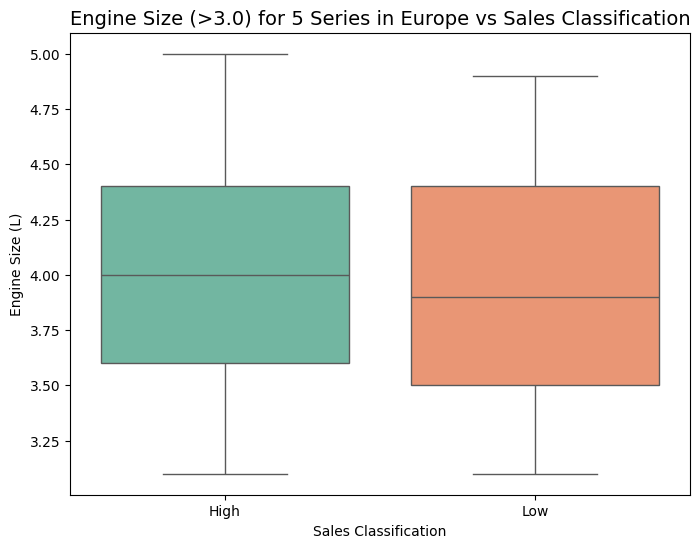

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


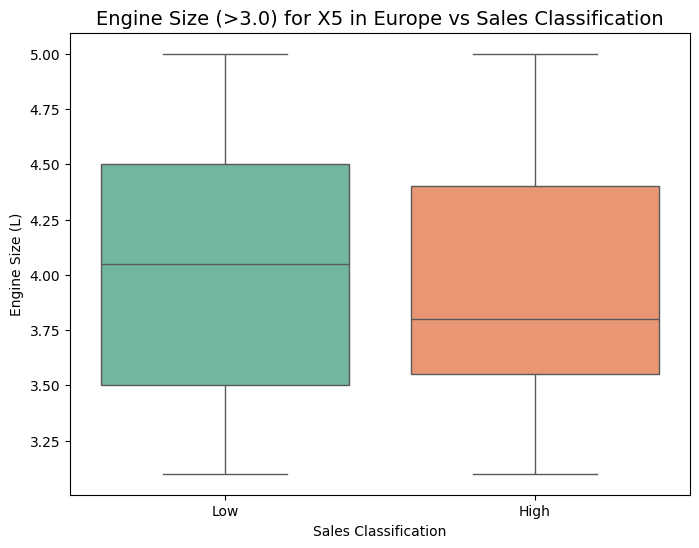

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


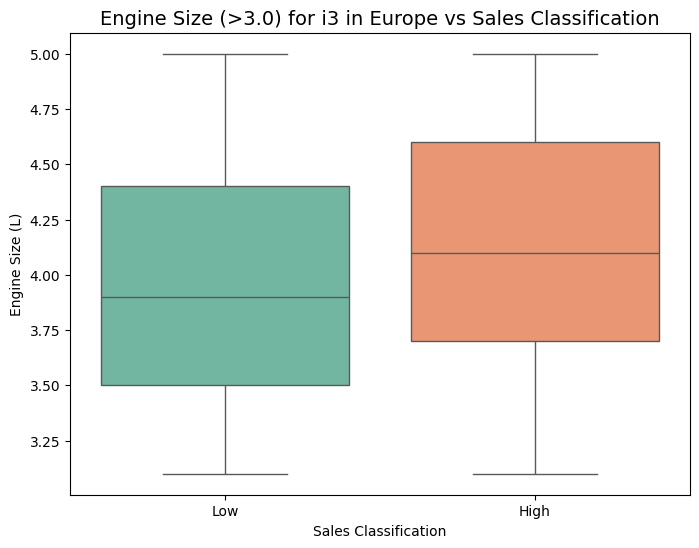

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


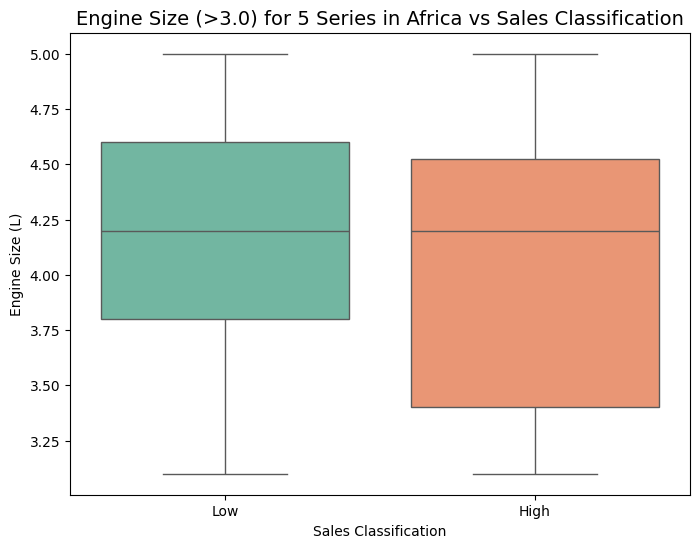

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


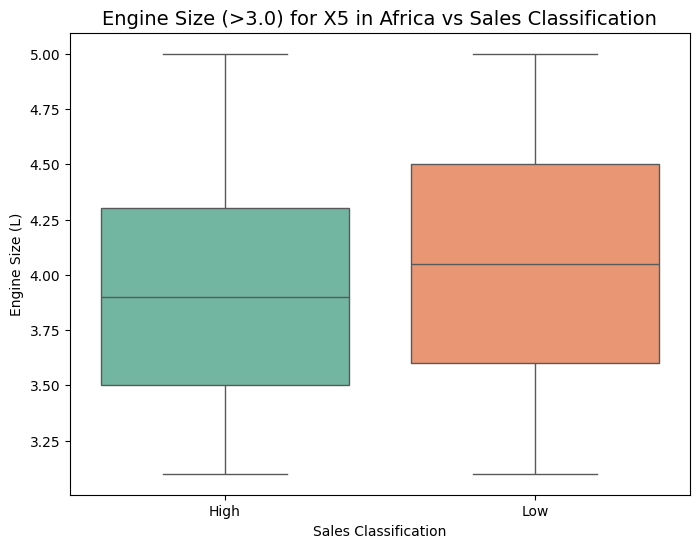

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


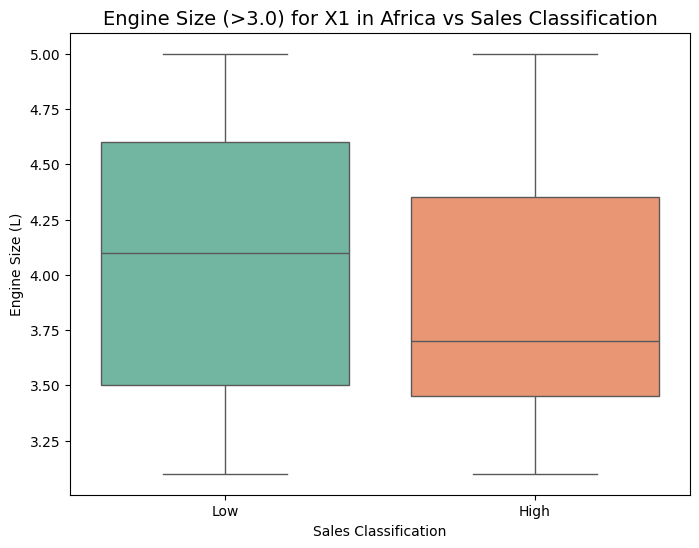

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


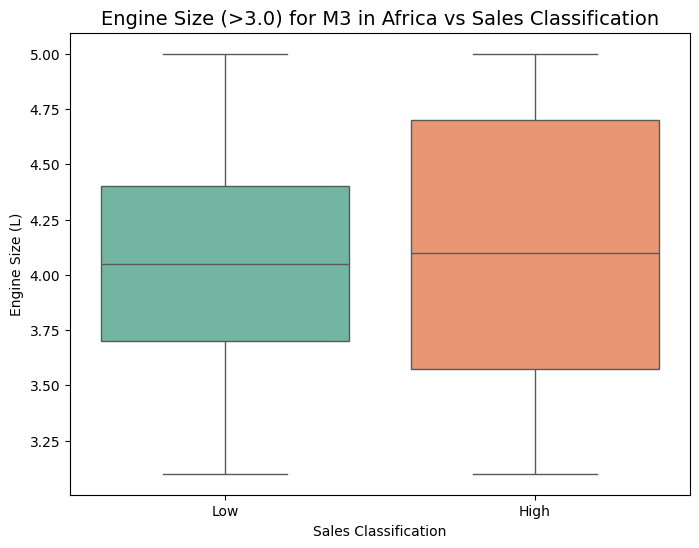

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


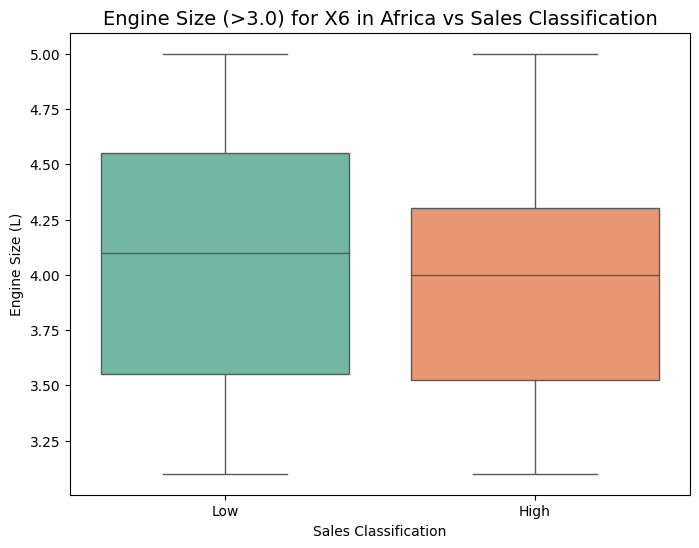

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


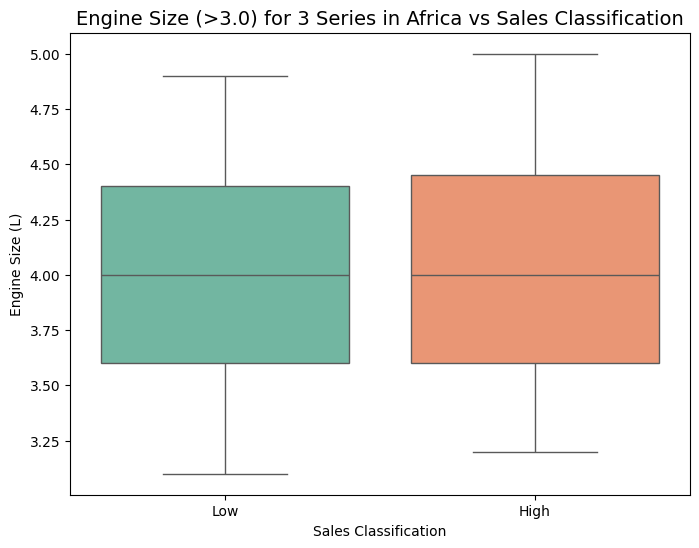

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


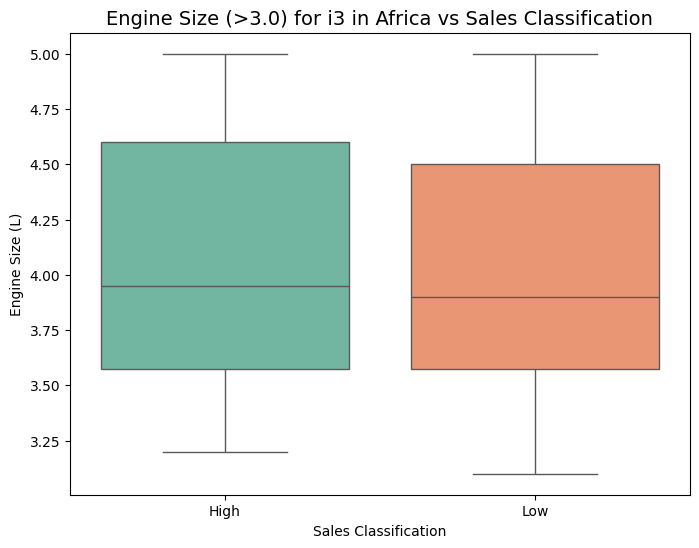

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


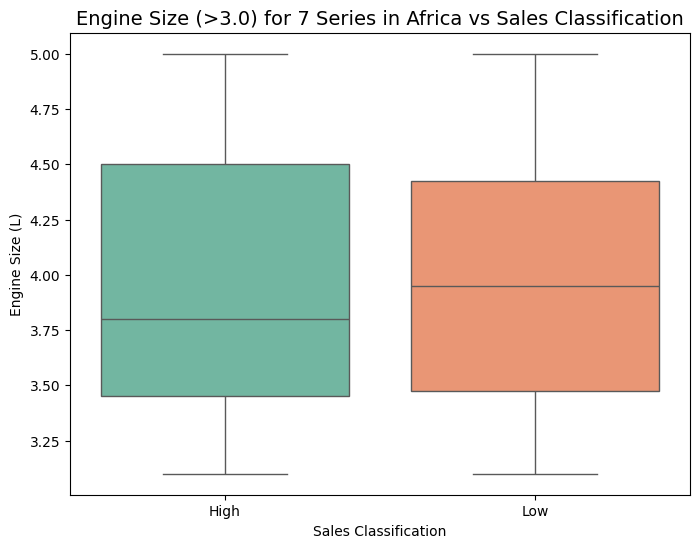

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


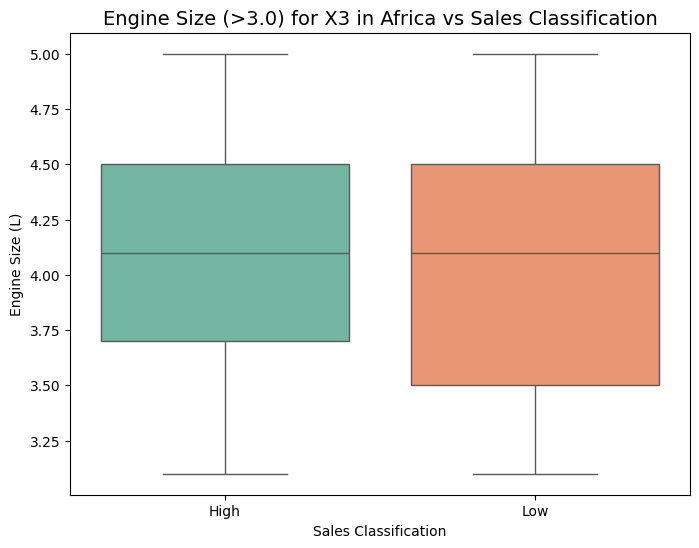

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


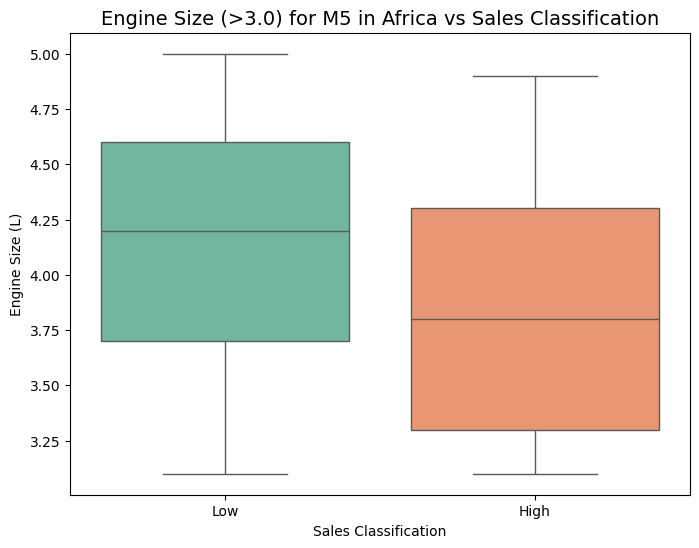

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17496\3152919351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")


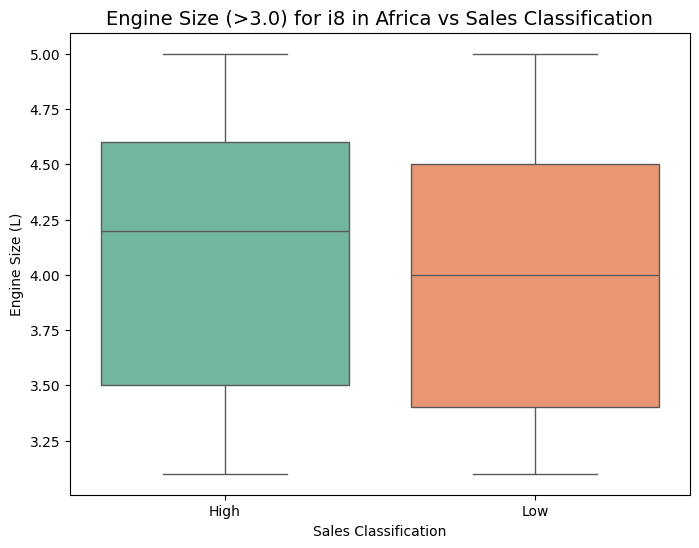

In [11]:
# Get a list of all unique regions
unique_regions = bmw_dataset['Region'].unique()

# Loop through each unique region
for region_name in unique_regions:
    # Filter the DataFrame for the current region
    df_region = bmw_dataset[bmw_dataset['Region'] == region_name]

    # Loop through each model in that region
    for model_name in df_region['Model'].unique():
        df_model = df_region[df_region['Model'] == model_name]
        df_filtered = df_model[df_model["Engine_Size_L"] > 3.0]

        if not df_filtered.empty:  # Only plot if data exists
            plt.figure(figsize=(8, 6))
            sns.boxplot(x="Sales_Classification", y="Engine_Size_L", data=df_filtered, palette="Set2")

            plt.title(f"Engine Size (>3.0) for {model_name} in {region_name} vs Sales Classification", fontsize=14)
            plt.xlabel("Sales Classification")
            plt.ylabel("Engine Size (L)")
            plt.show()

Number of Cars per Model and Color

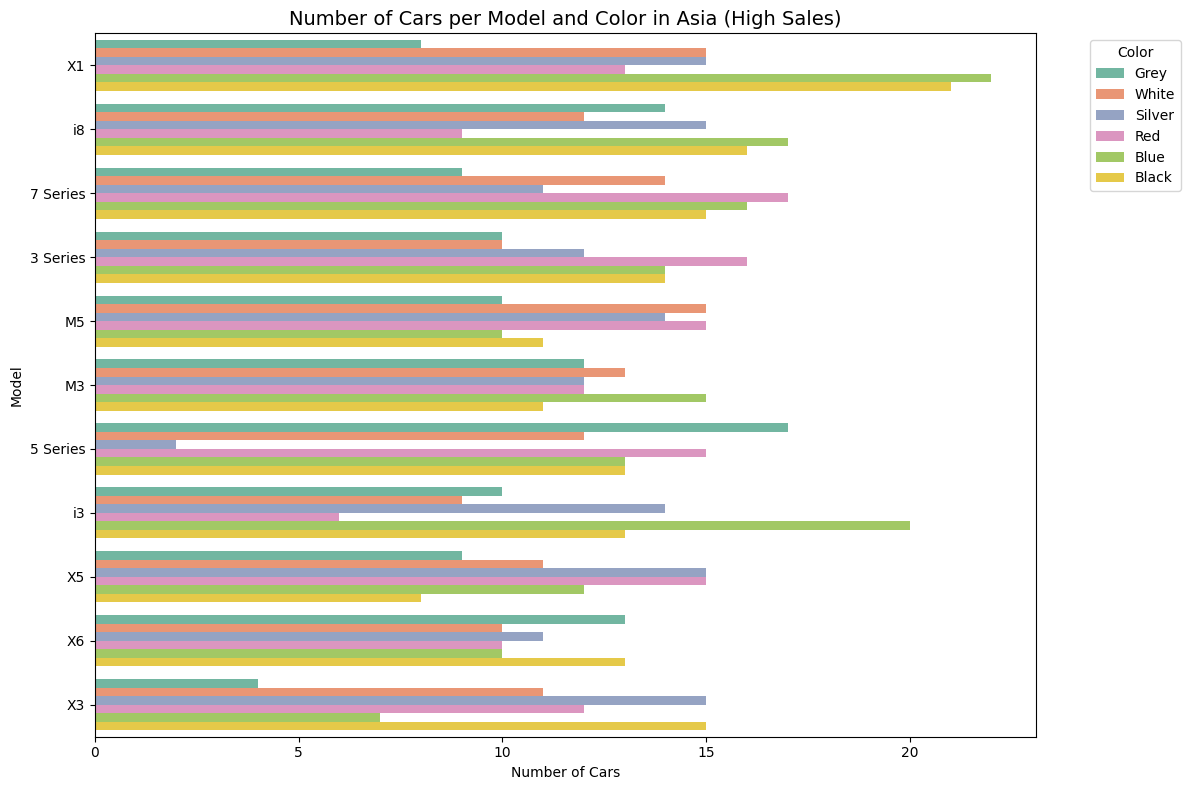

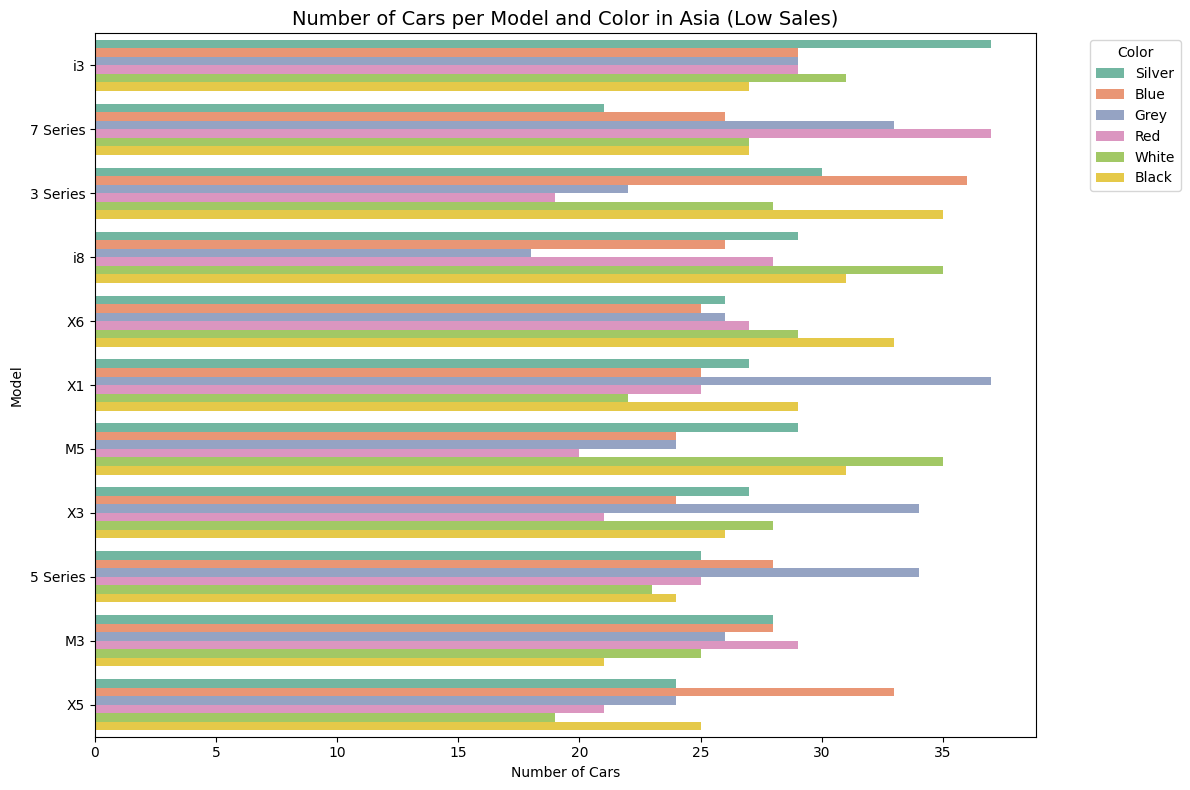

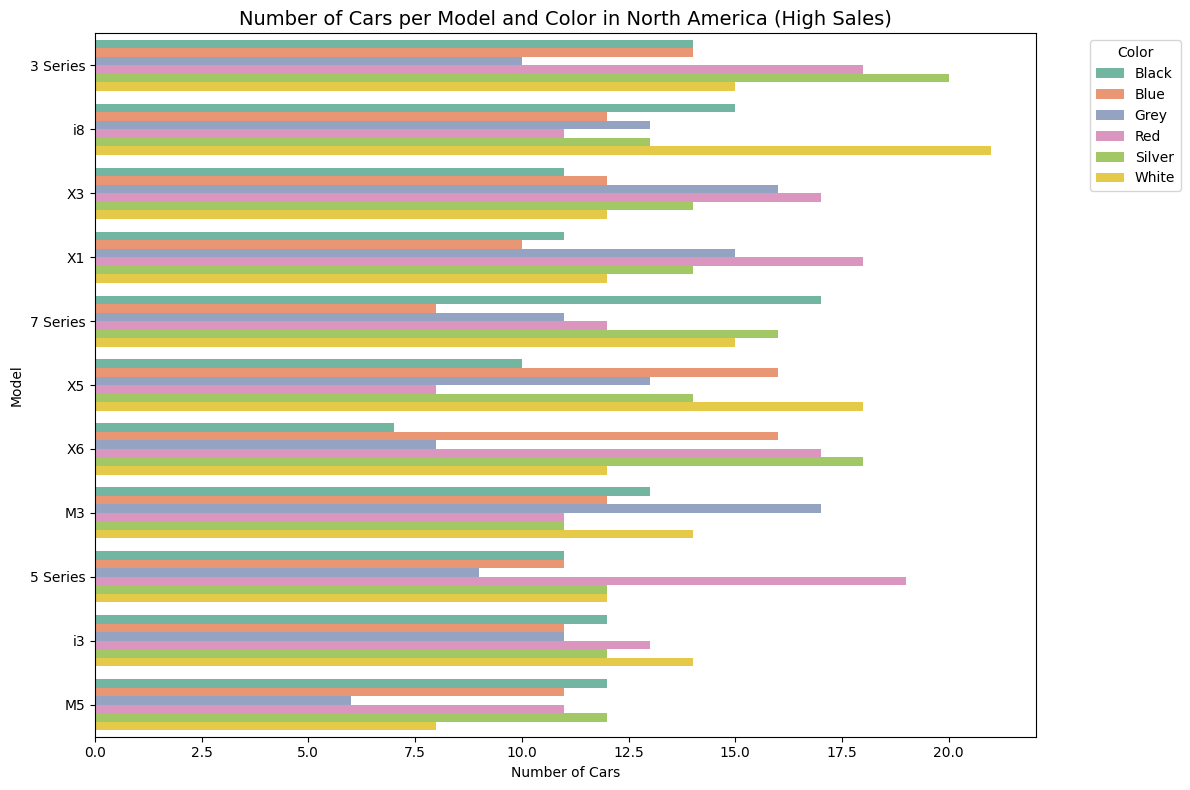

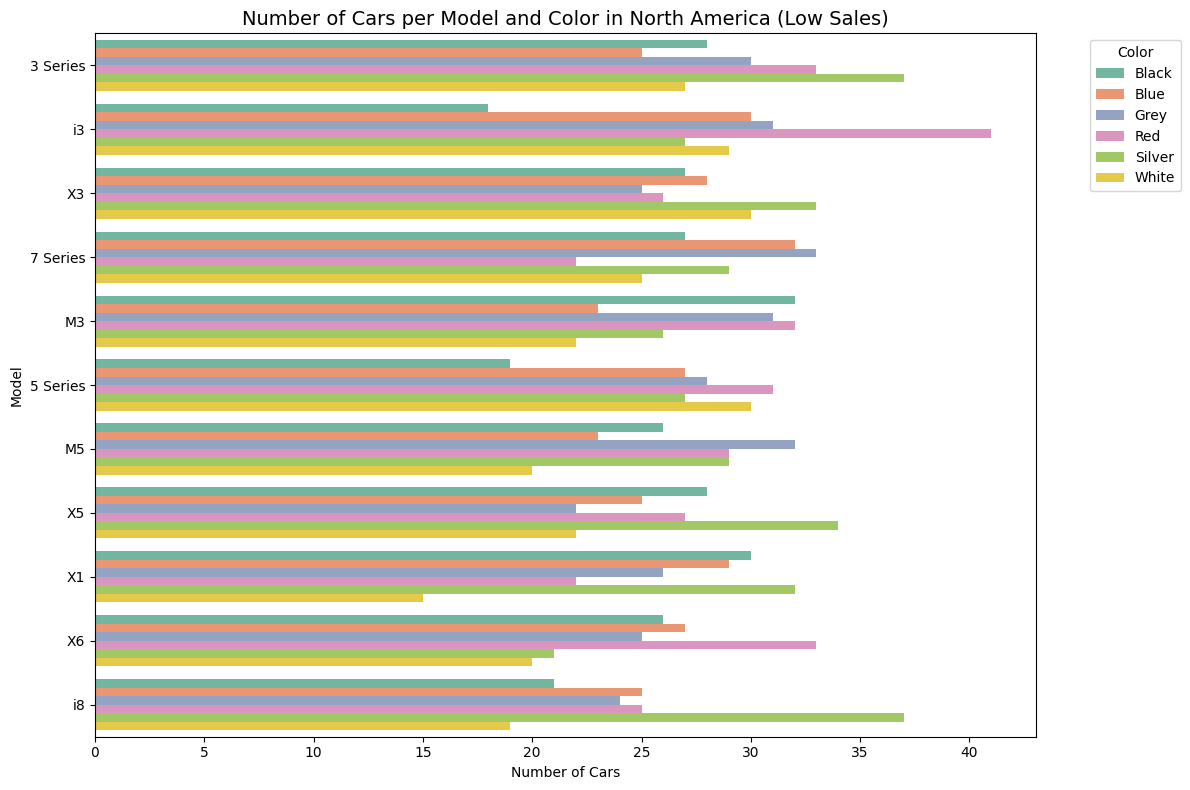

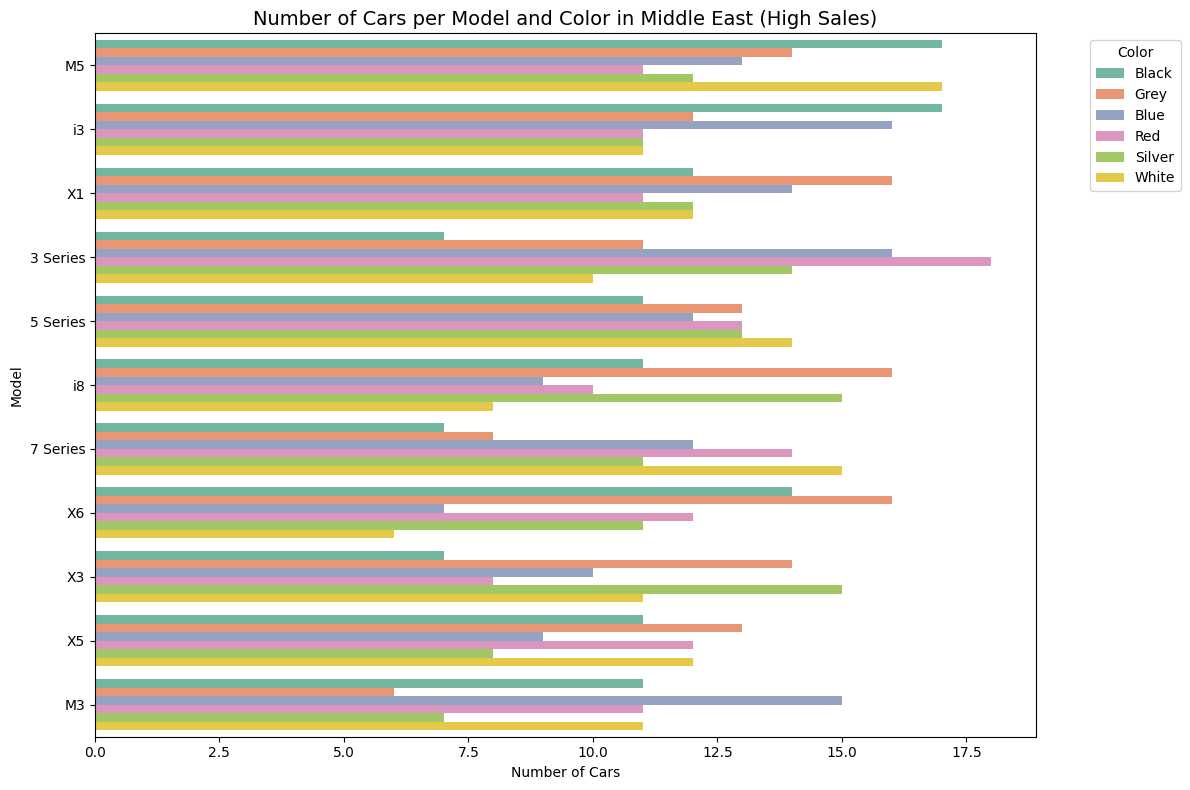

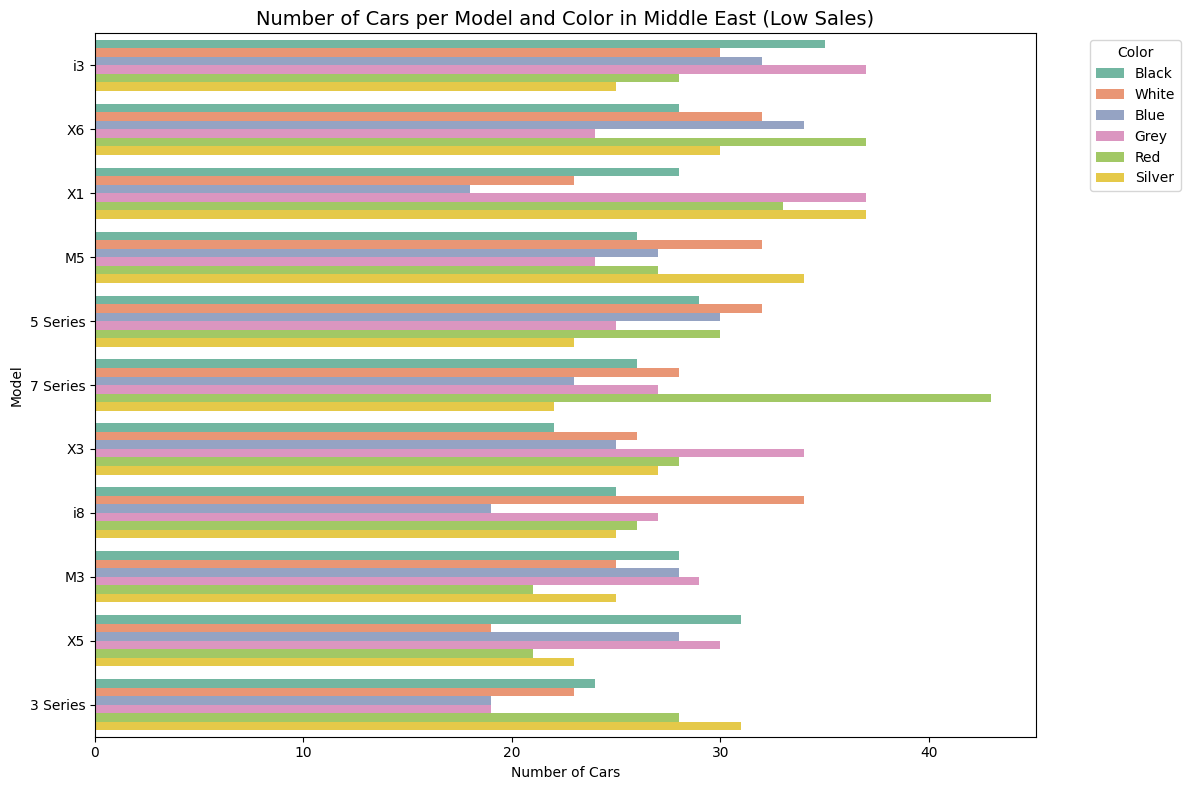

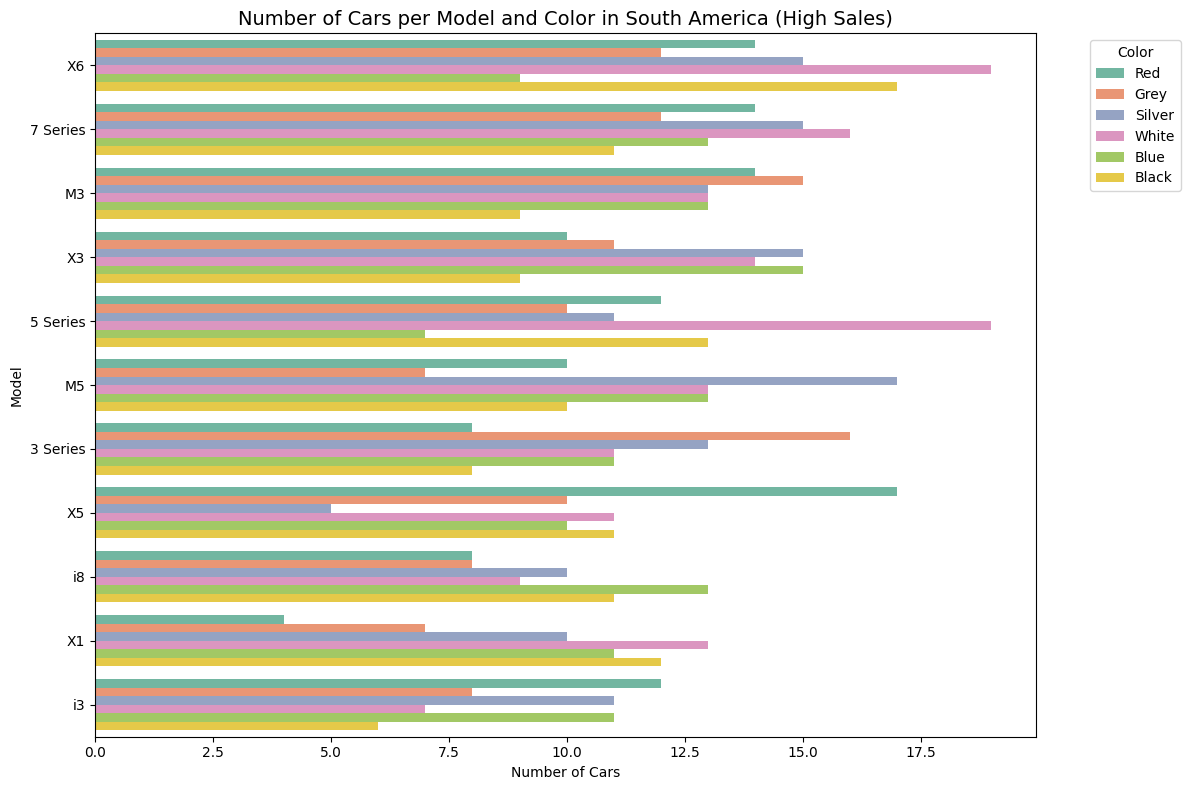

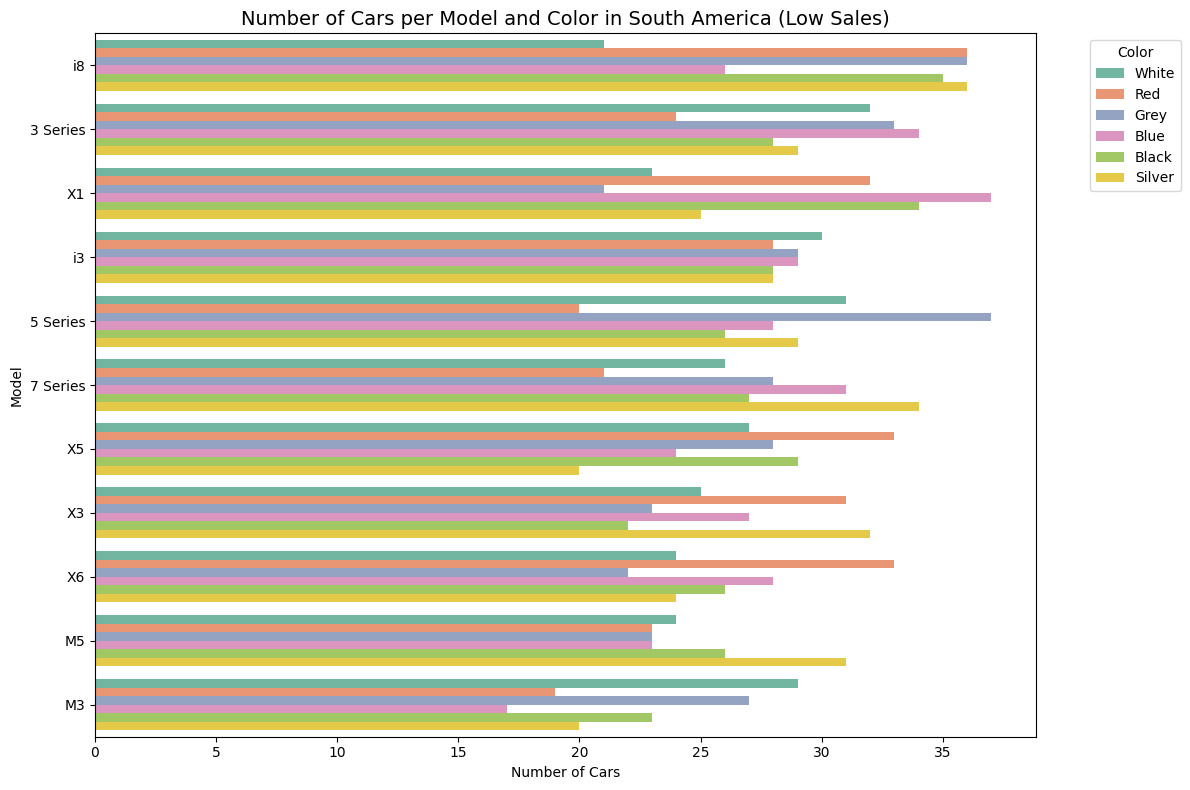

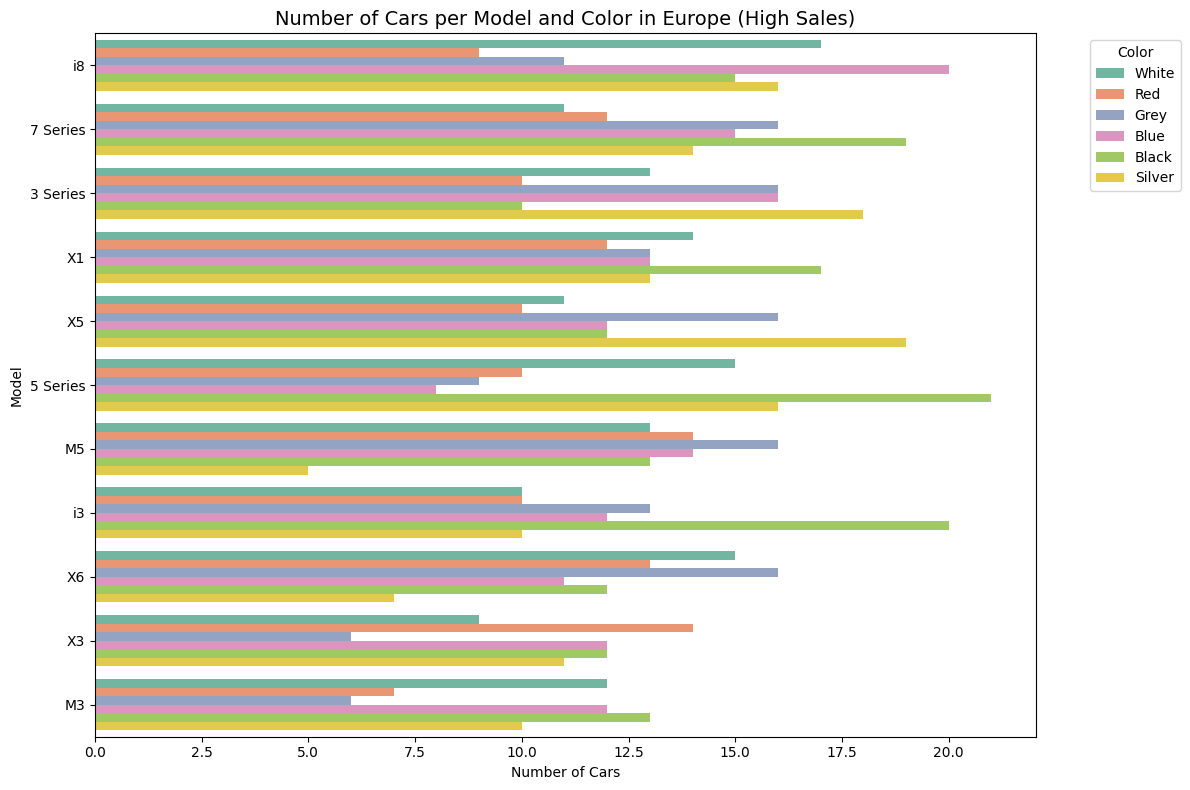

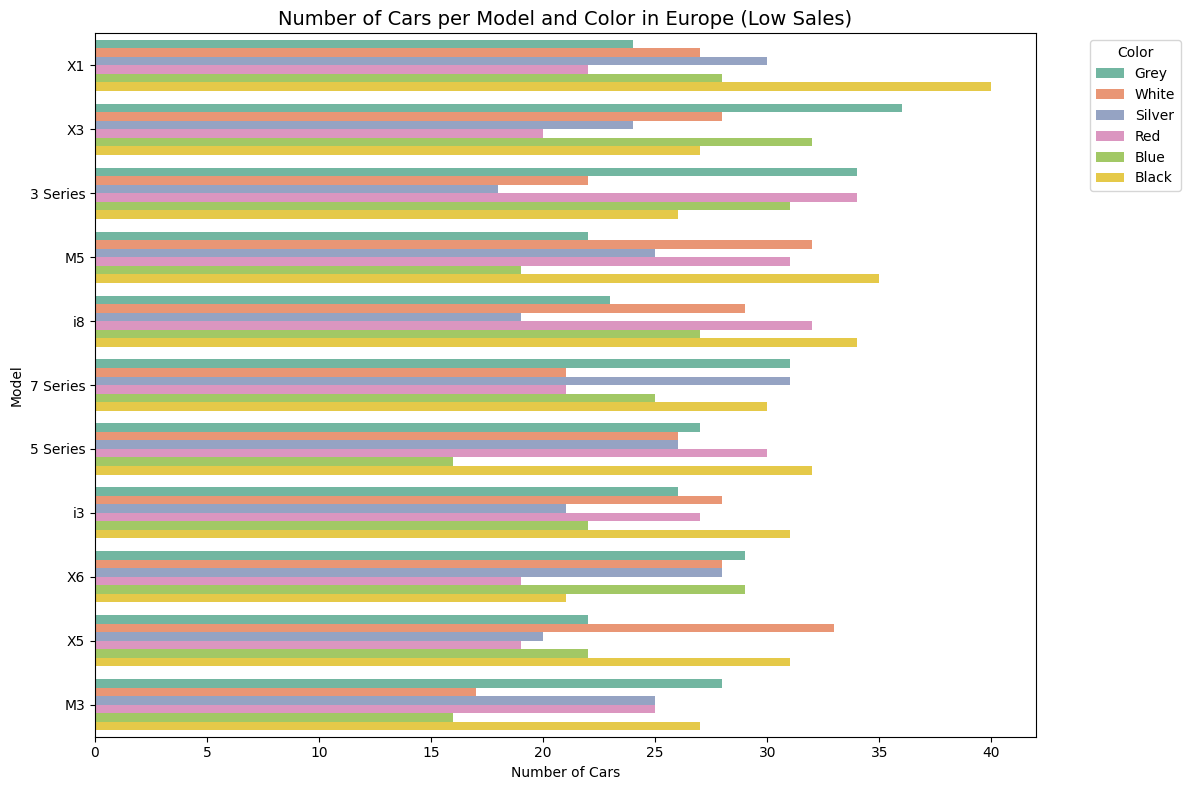

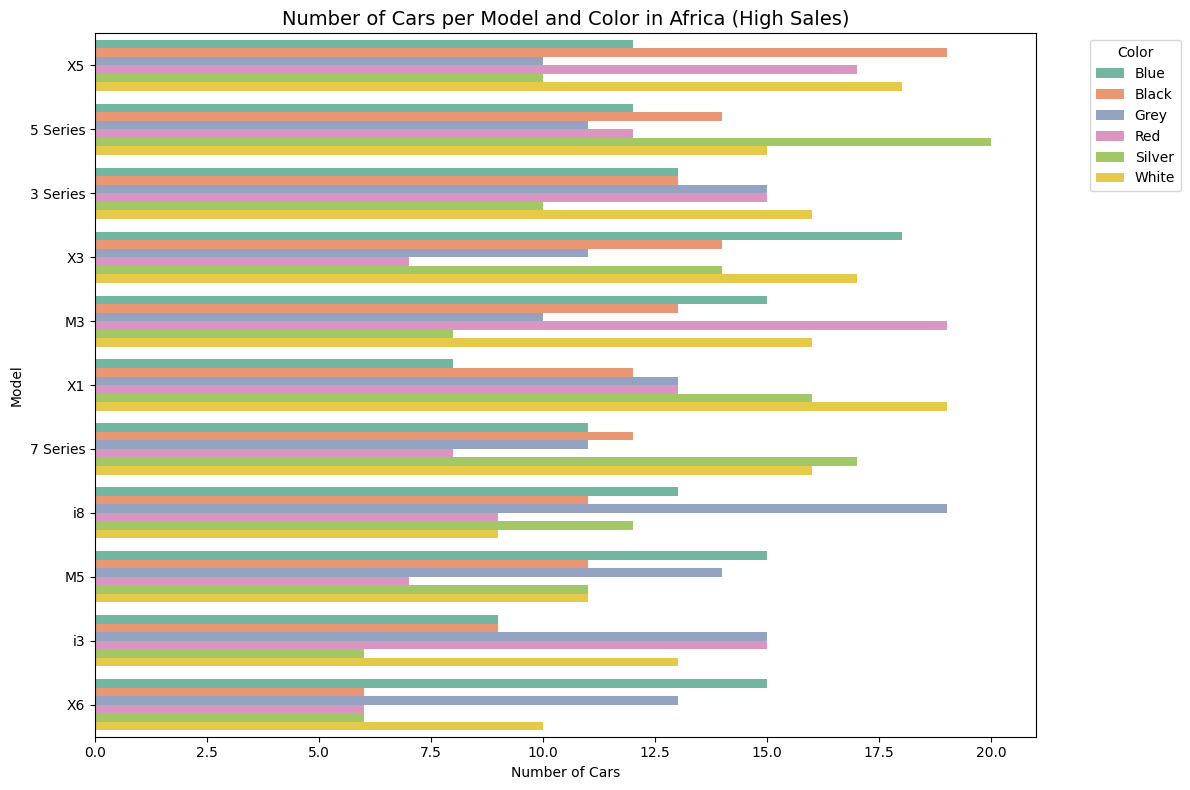

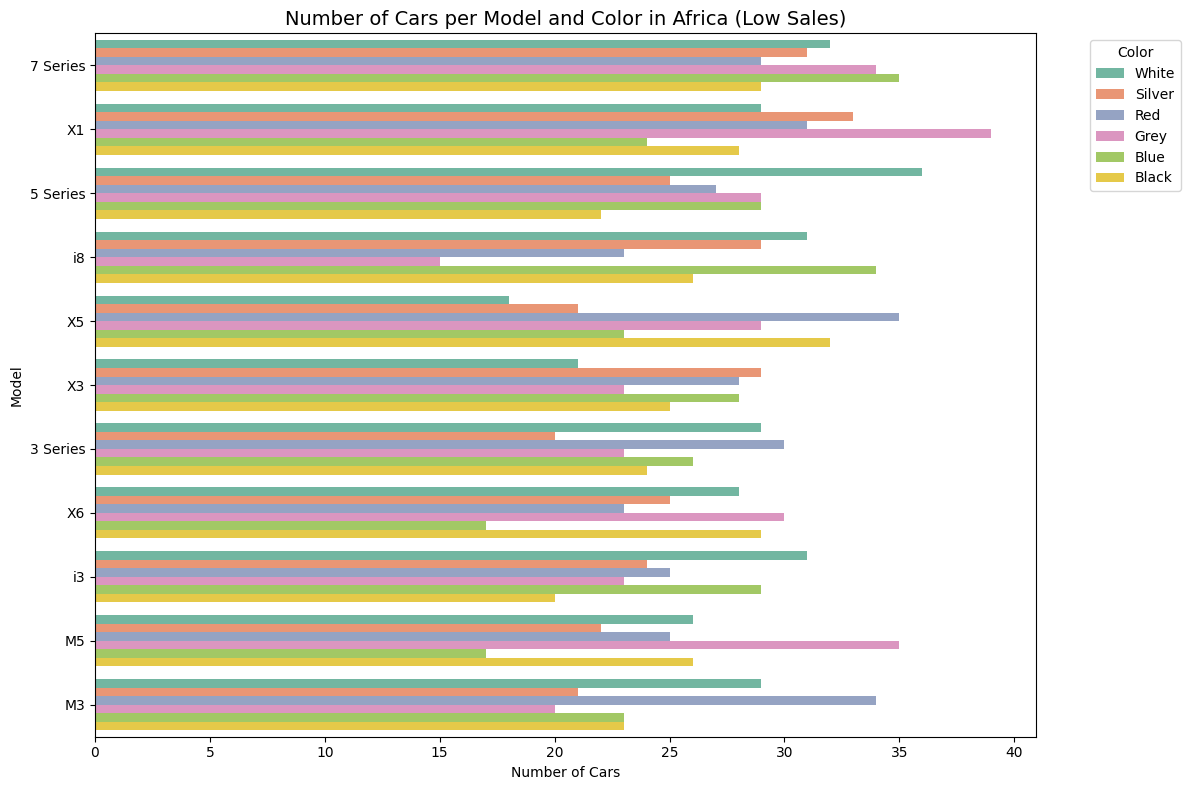

In [14]:
# Get unique regions and sales classifications
unique_regions = bmw_dataset['Region'].unique()
unique_classifications = bmw_dataset['Sales_Classification'].unique()

for region in unique_regions:
    for cls in unique_classifications:
        # Filter dataset
        df_filtered = bmw_dataset[
            (bmw_dataset['Region'] == region) &
            (bmw_dataset['Sales_Classification'] == cls)
        ]

        # Check if the filtered DataFrame is empty
        if df_filtered.empty:
            continue

        # Count number of cars per model and color
        df_count = df_filtered.groupby(['Model', 'Color']).size().reset_index(name='Count')

        # Sort the data by Model count for better visualization
        model_order = df_count.groupby('Model')['Count'].sum().sort_values(ascending=False).index
        df_count['Model'] = pd.Categorical(df_count['Model'], categories=model_order, ordered=True)
        df_count.sort_values('Model', inplace=True)

        # Plot
        plt.figure(figsize=(12, 8))
        sns.barplot(y='Model', x='Count', hue='Color', data=df_count, palette="Set2")
        plt.title(f"Number of Cars per Model and Color in {region} ({cls} Sales)", fontsize=14)
        plt.xlabel("Number of Cars")
        plt.ylabel("Model")
        plt.legend(title="Color", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # Print the grouped data
     #   print(f"\nGrouped data for {region} ({cls} sales):\n")
     #  print(df_count.to_markdown(index=False, numalign="left", stralign="left"))
     #   print("\n" + "="*50 + "\n")

Correlation matrix per region 

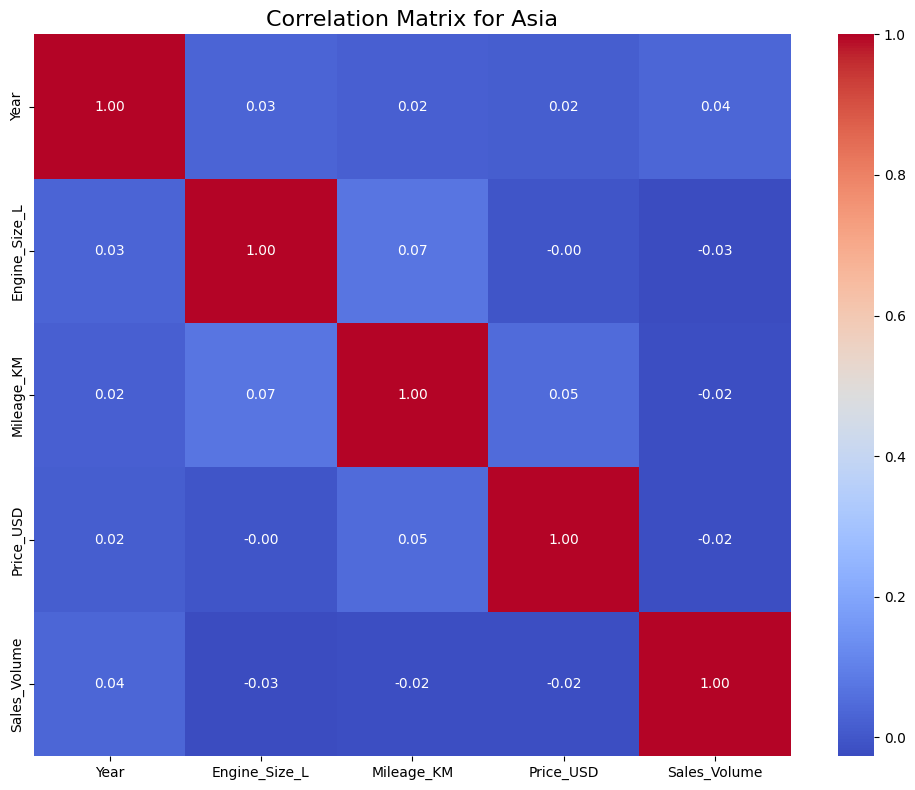

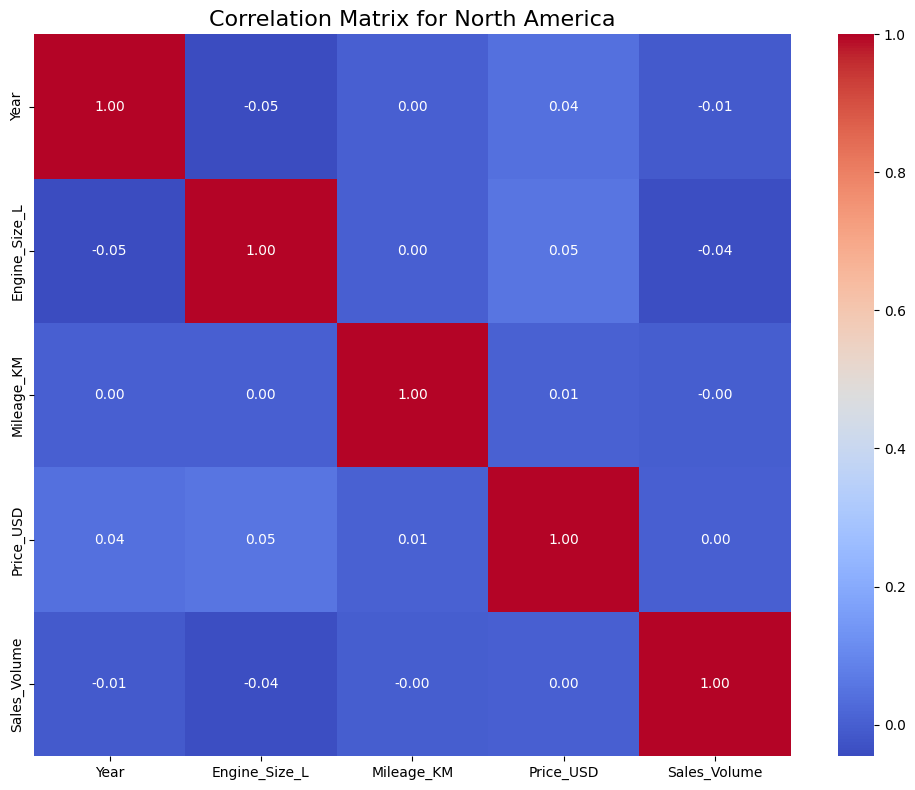

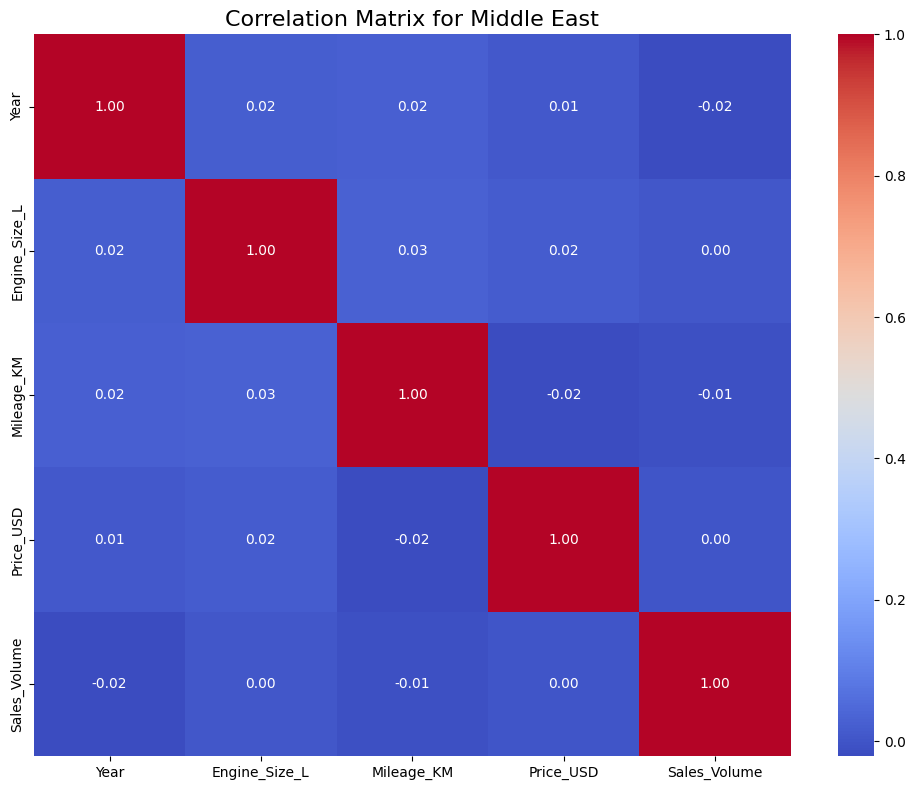

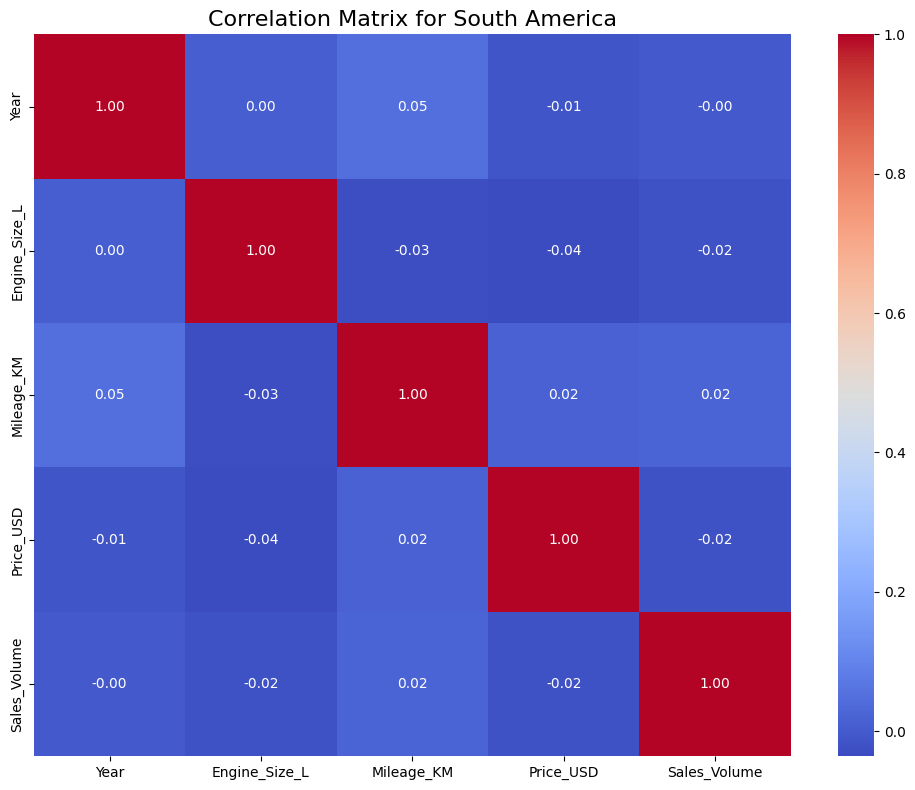

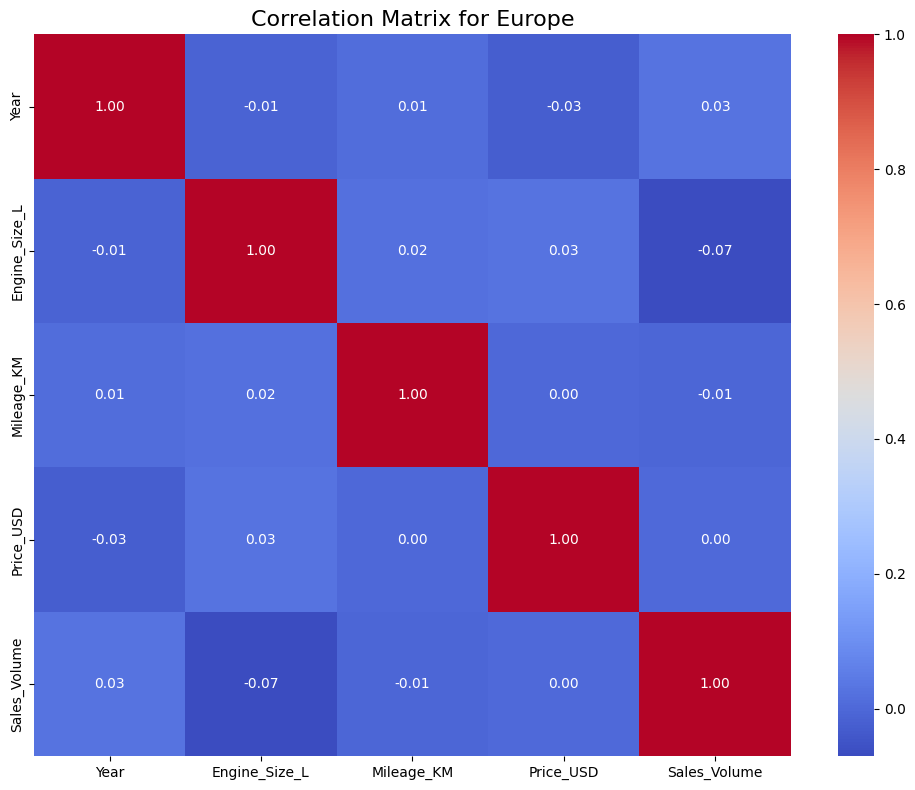

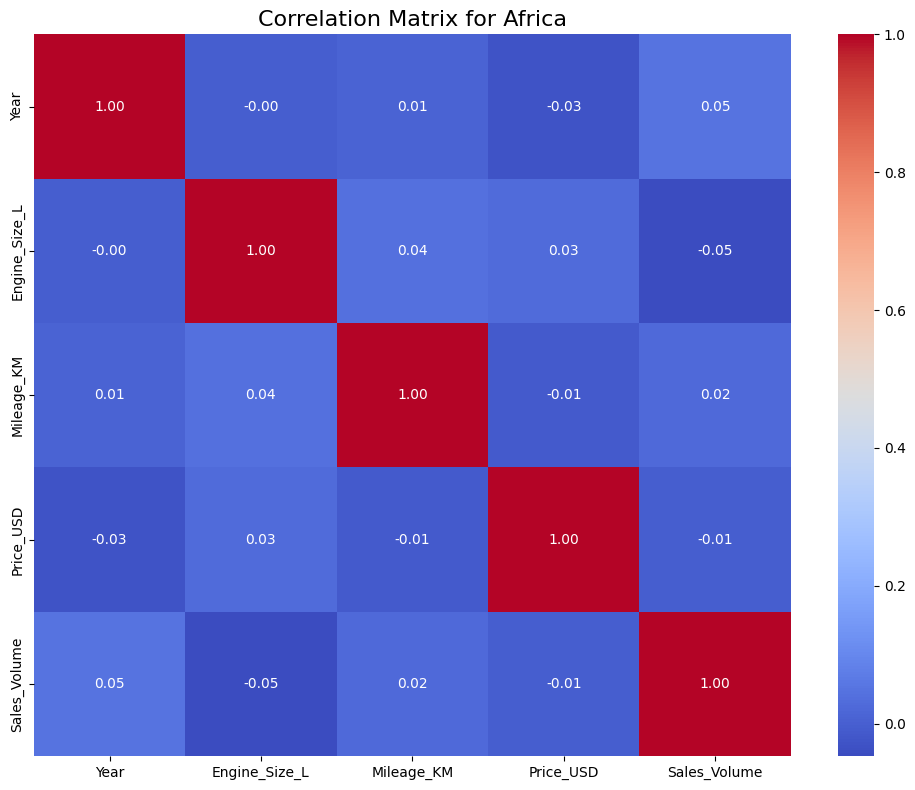

In [5]:
# Get unique regions
unique_regions = bmw_dataset['Region'].unique()

# Define the numerical columns for correlation analysis
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

for region in unique_regions:
    # Filter the DataFrame for the current region
    df_filtered = bmw_dataset[(bmw_dataset['Region'] == region) &
                              (bmw_dataset['Year'] <= 2016)]

    # Select numerical columns
    df_numerical = df_filtered[numerical_cols]

    # Calculate the correlation matrix
    correlation_matrix = df_numerical.corr()

    # Create a heatmap and display it directly in the notebook
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {region}', fontsize=16)
    plt.tight_layout()
    plt.show() # This command displays the plot in the notebook output


Correlation matrix per region every four years

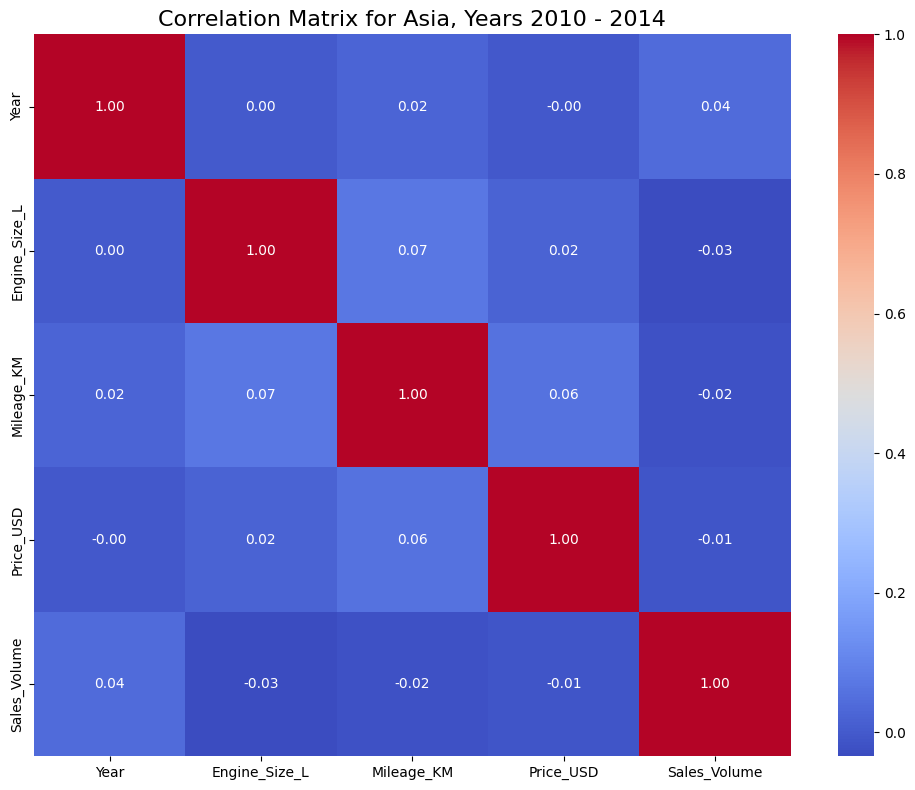

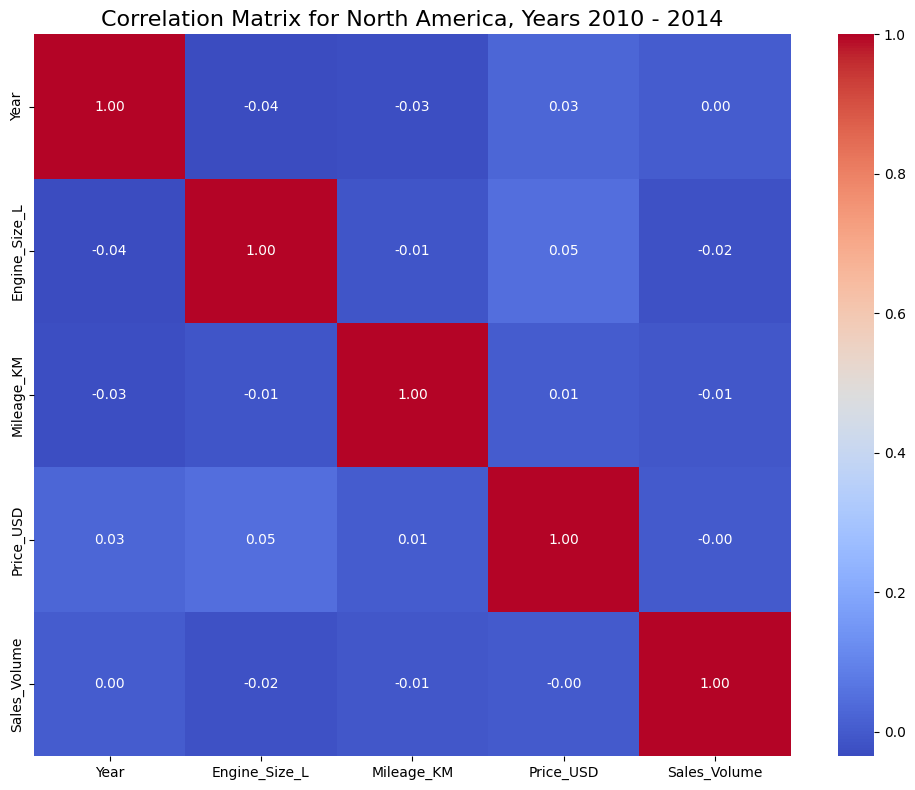

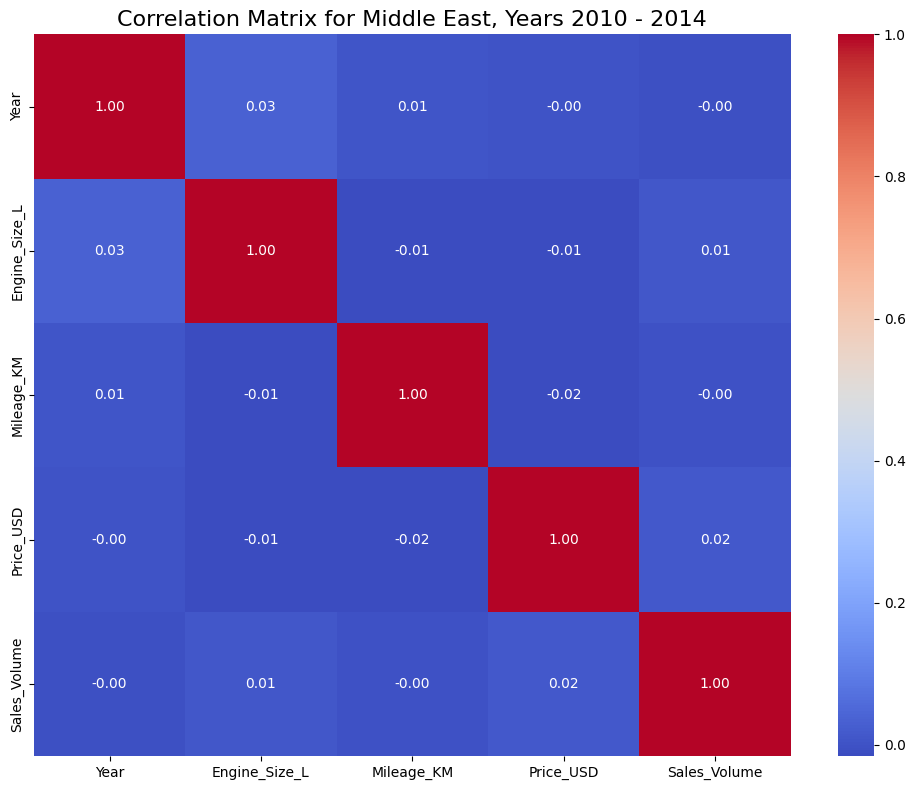

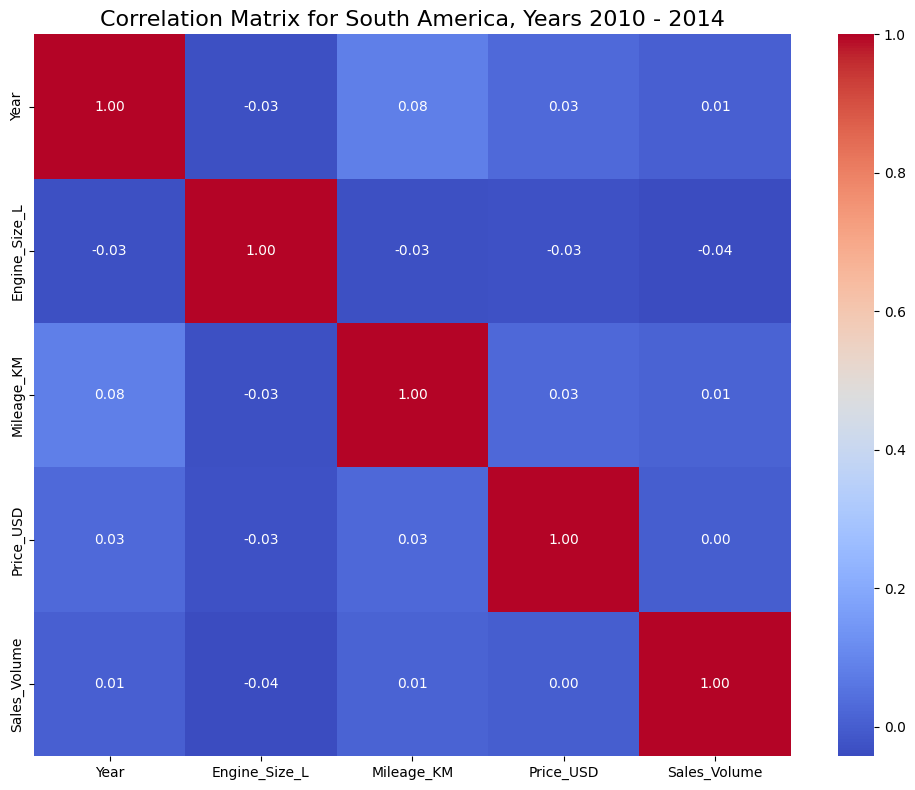

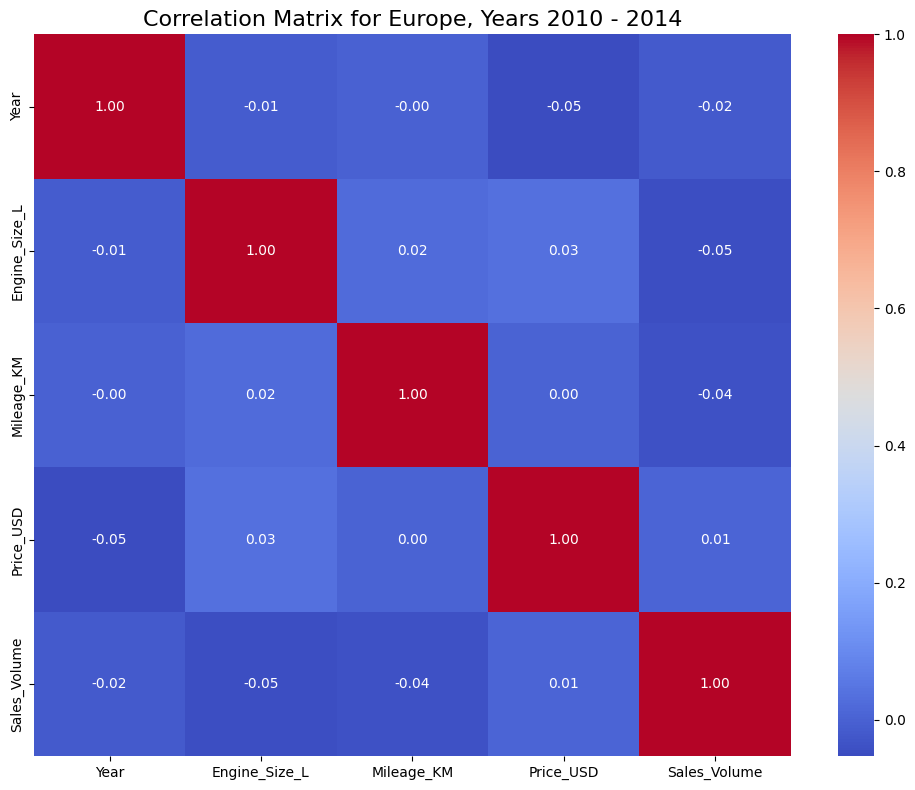

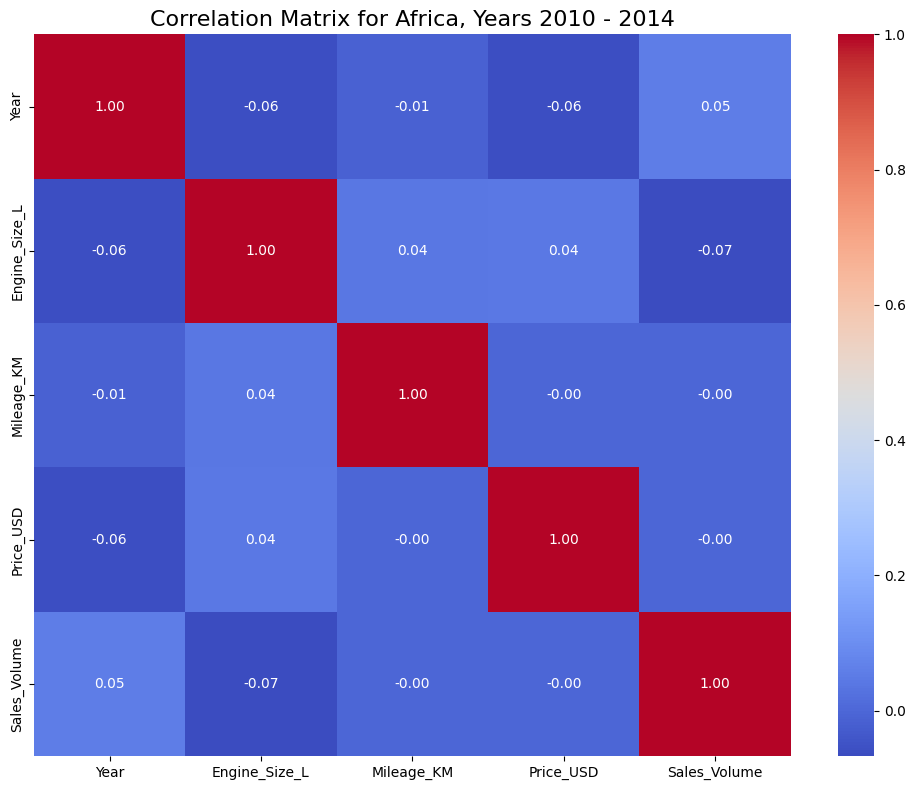

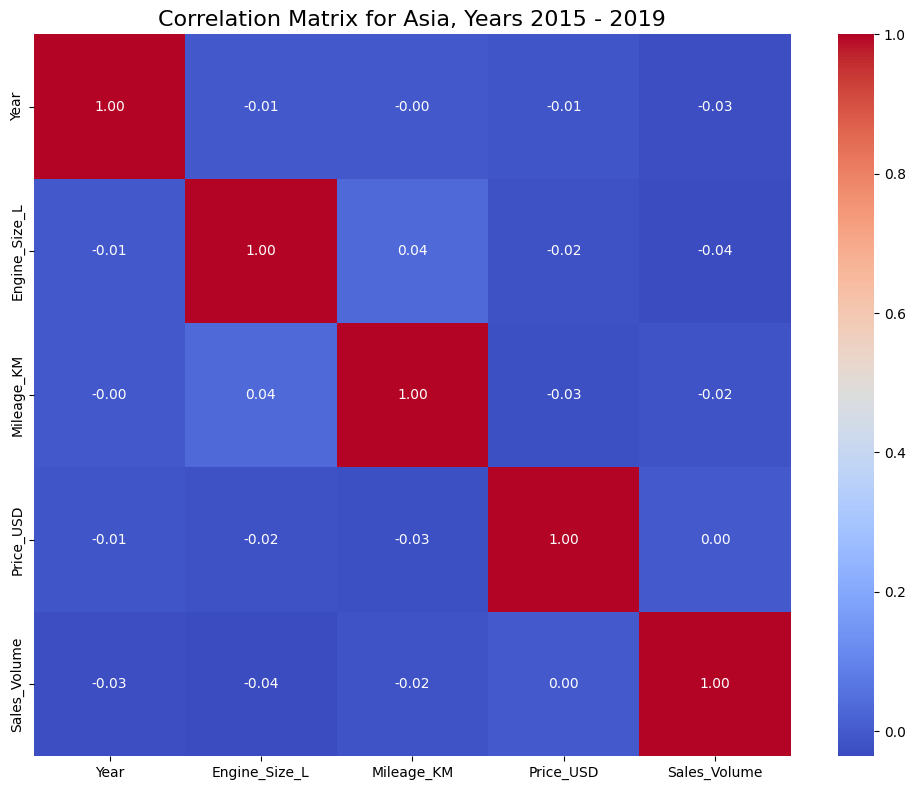

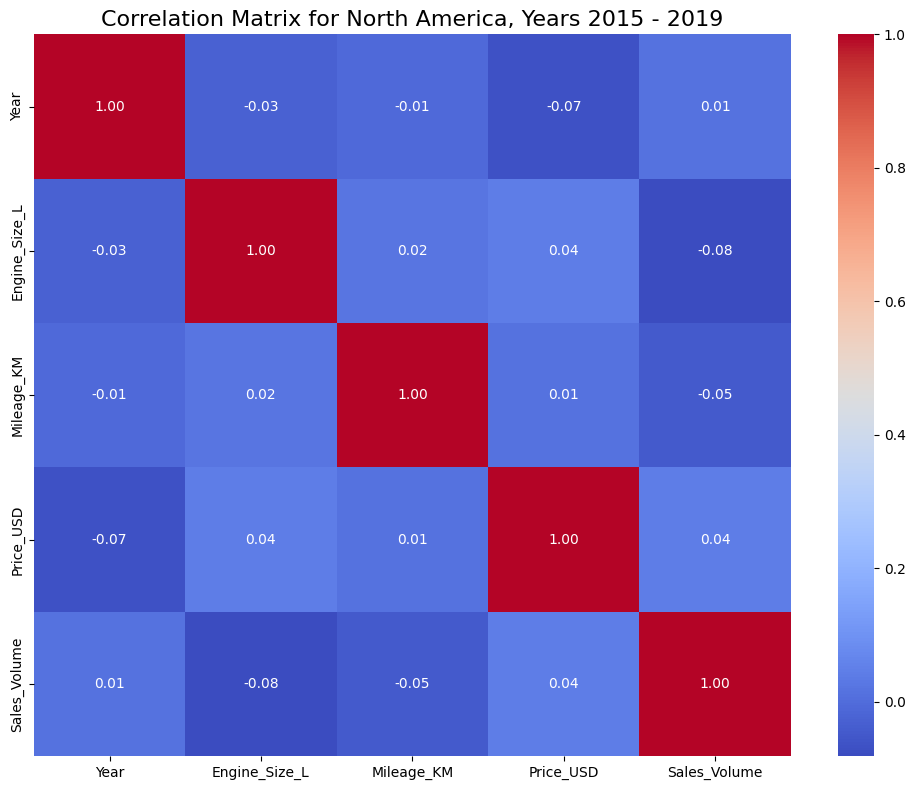

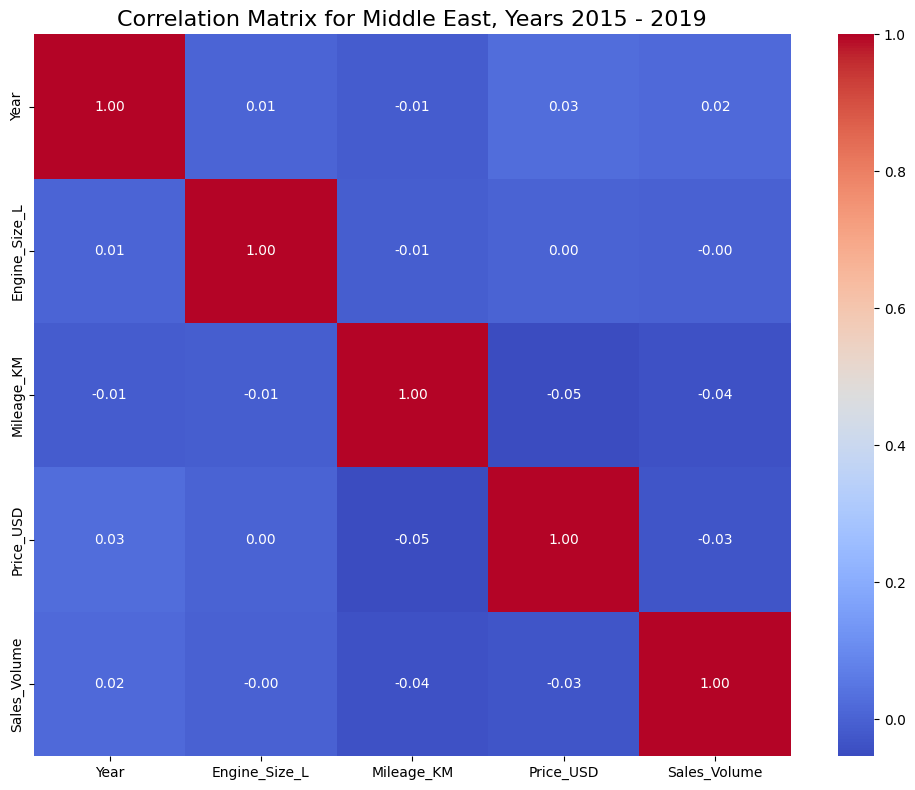

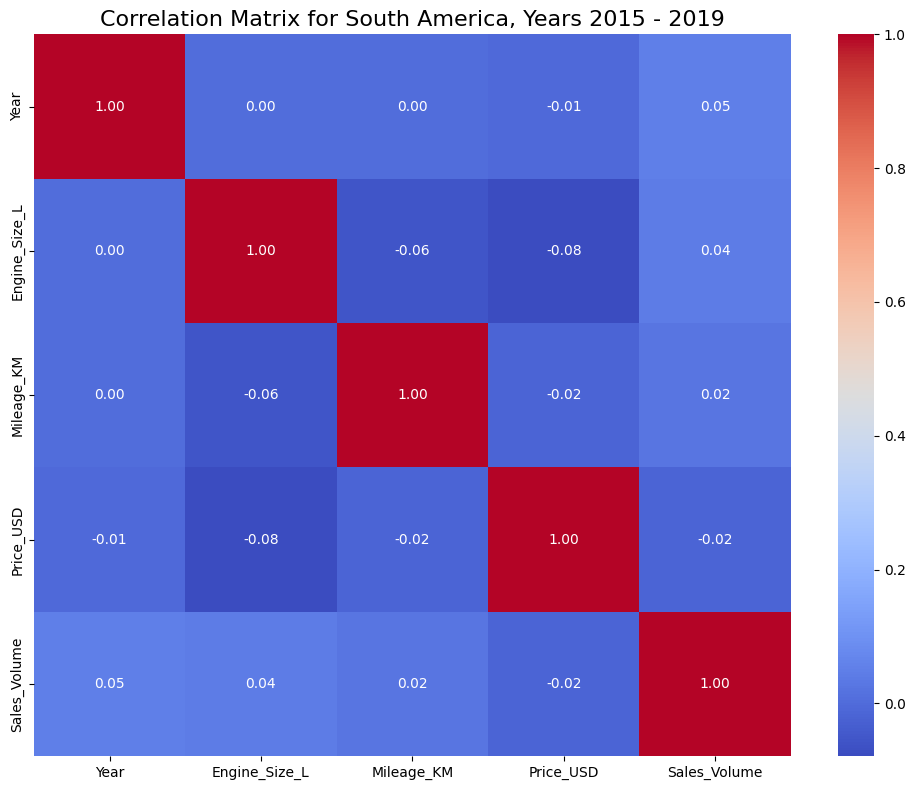

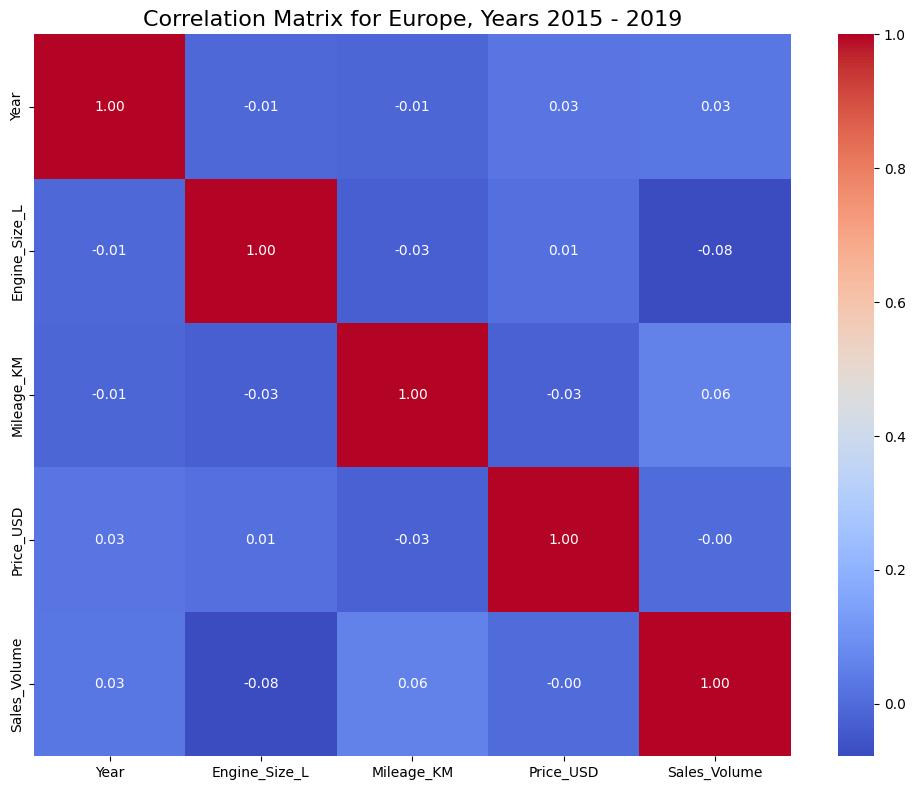

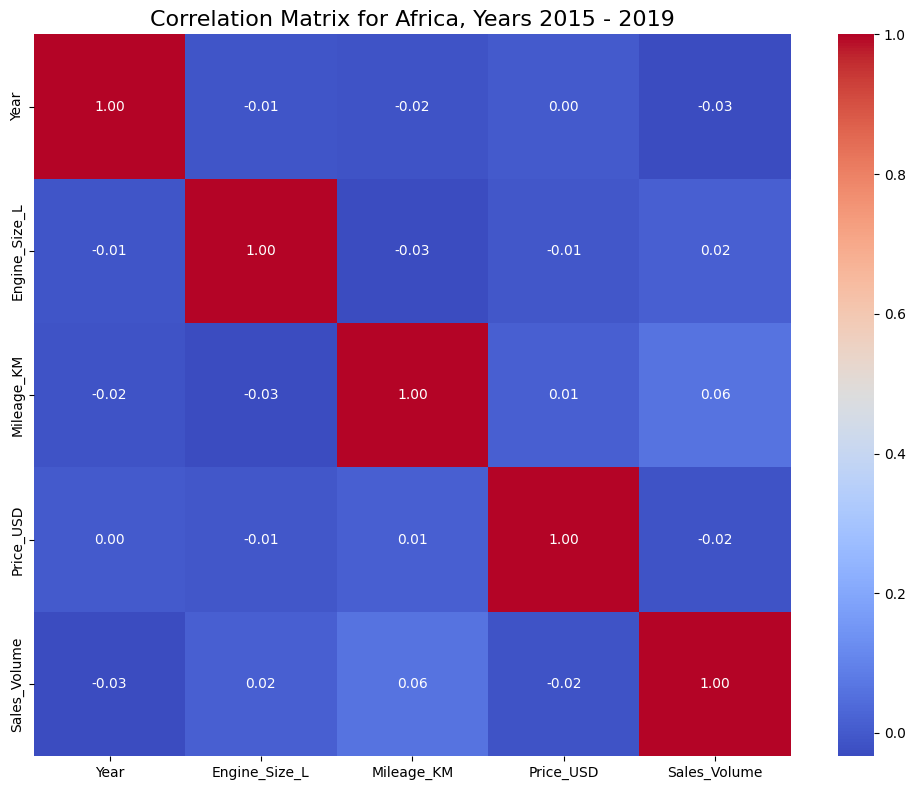

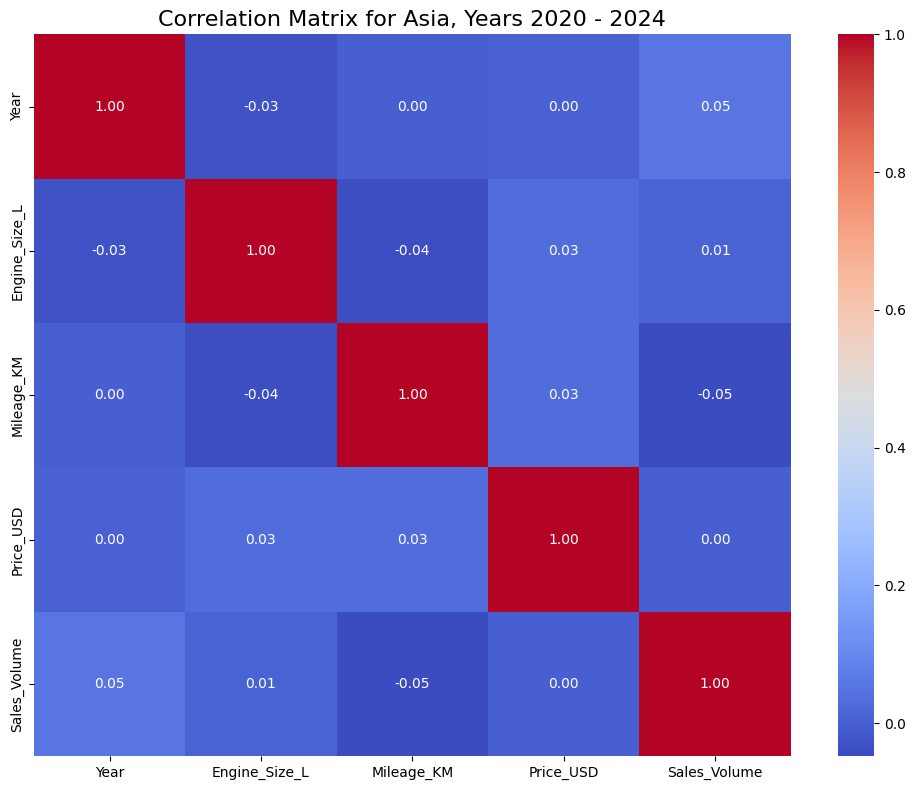

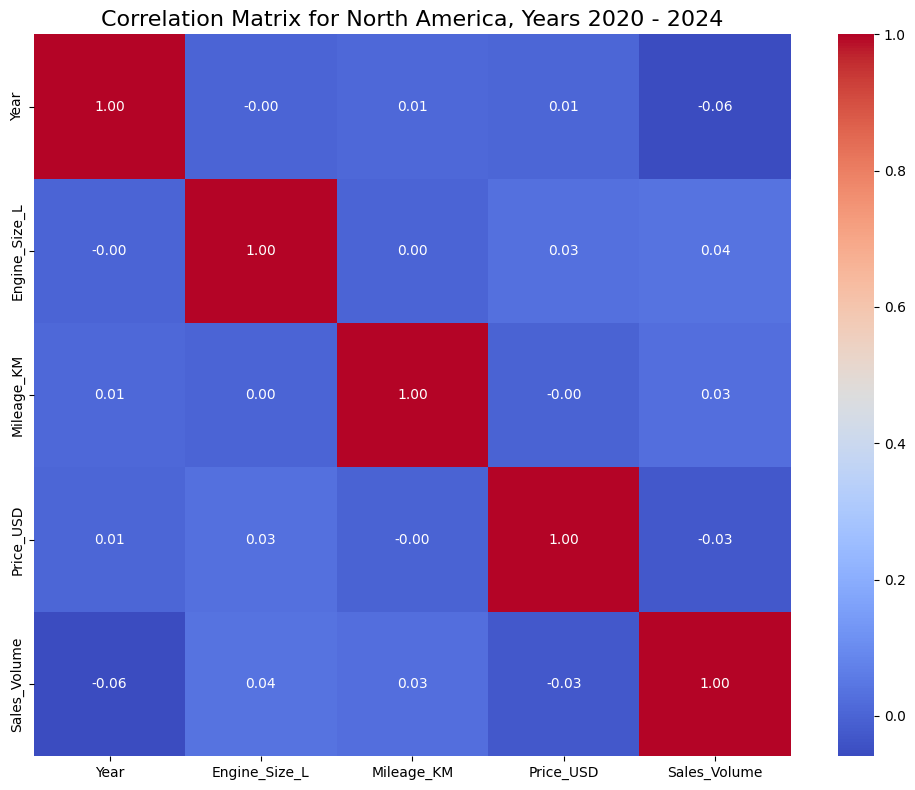

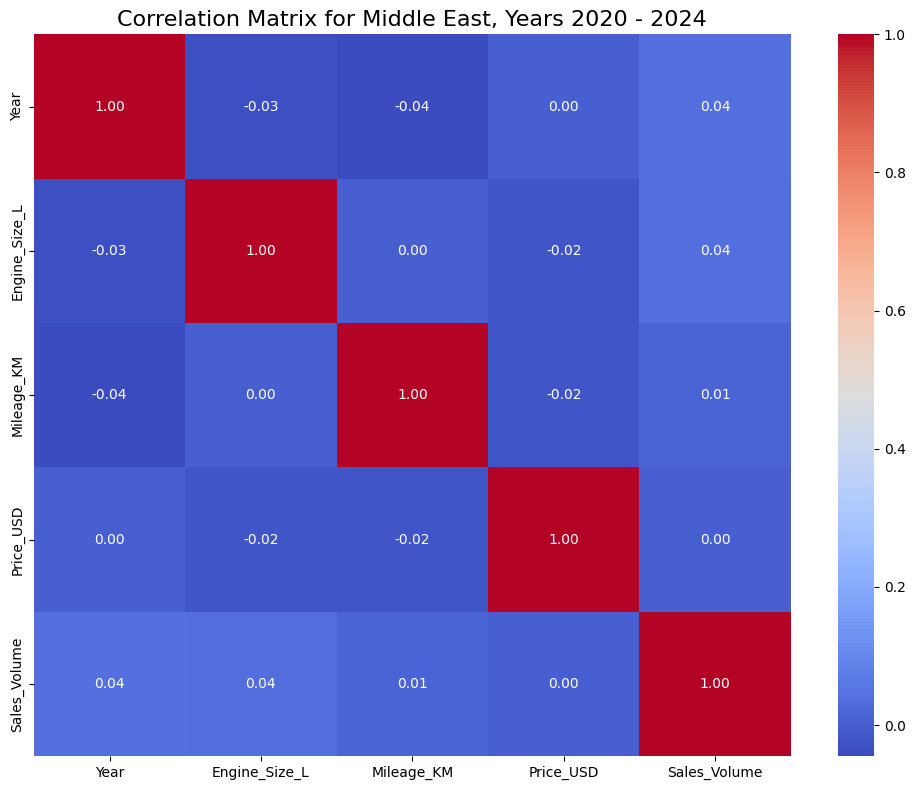

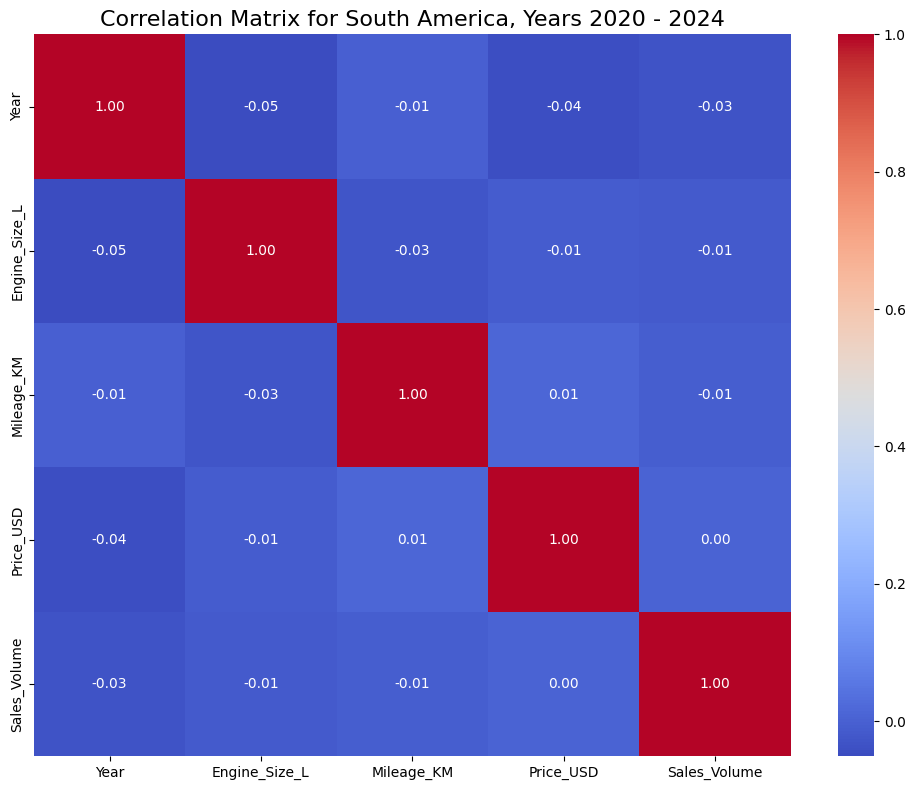

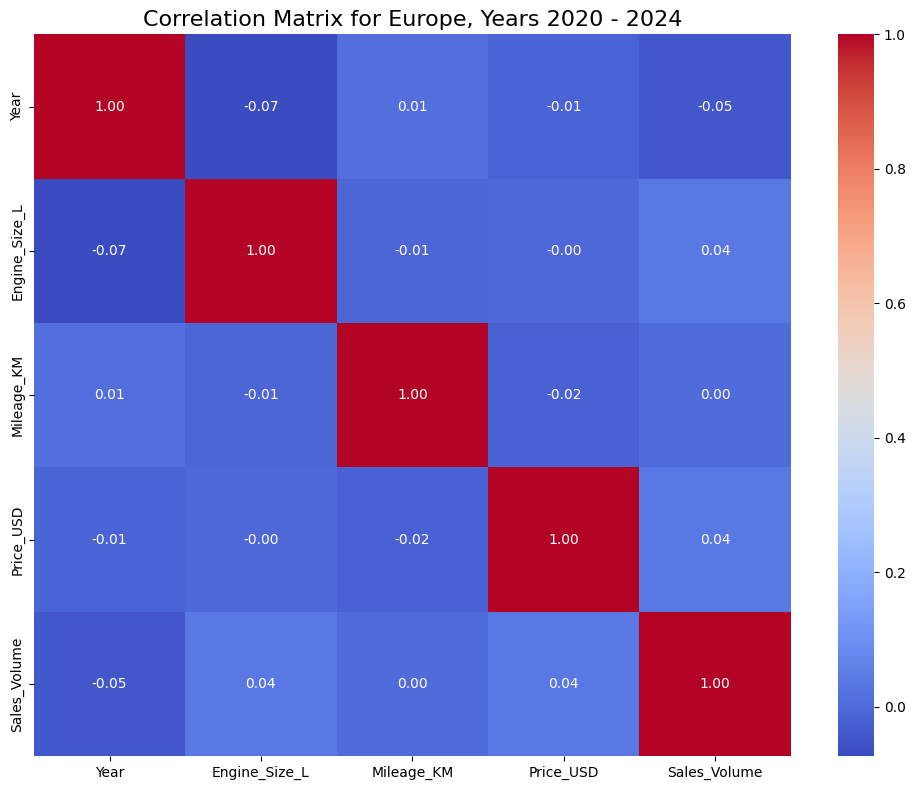

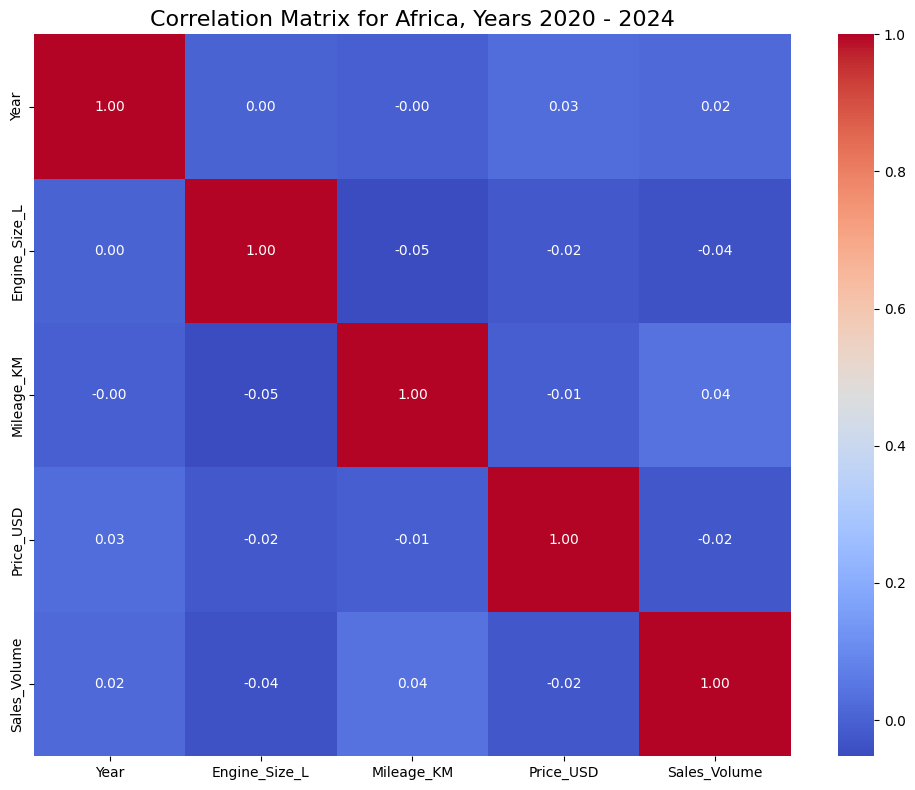

All correlation matrices have been generated and displayed for each region and 4-year interval.


In [10]:
# Define the numerical columns for correlation analysis
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

# Get unique regions
unique_regions = bmw_dataset['Region'].unique()

# Get the min and max years to define the range for 5-year intervals
min_year = int(bmw_dataset['Year'].min())
max_year = int(bmw_dataset['Year'].max())

# Loop through every 5-year interval
for start_year in range(min_year, max_year + 1, 5):
    end_year = start_year + 4
    
    # Loop through each unique region
    for region in unique_regions:
        # Filter the DataFrame for the current 5-year interval and region
        df_filtered = bmw_dataset[(bmw_dataset['Year'] >= start_year) &
                                  (bmw_dataset['Year'] <= end_year) &
                                  (bmw_dataset['Region'] == region)]
        
        # Check if the filtered DataFrame is not empty
        if not df_filtered.empty:
            # Select numerical columns
            df_numerical = df_filtered[numerical_cols]
            
            # Calculate the correlation matrix
            correlation_matrix = df_numerical.corr()
            
            # Create a heatmap and display it directly in the notebook
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
            plt.title(f'Correlation Matrix for {region}, Years {start_year} - {end_year}', fontsize=16)
            plt.tight_layout()
            plt.show()

print("All correlation matrices have been generated and displayed for each region and 4-year interval.")

Step 3: Machine learning

In [15]:
bmw_dataset.dropna(inplace=True)
# Define the target variable (y) and features (X)
# The features include both numerical and categorical columns.
features = ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
            'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
target = 'Sales_Classification'

# Get a list of all unique regions to iterate through
unique_regions = bmw_dataset['Region'].unique()

# --- Main loop to train and evaluate a model for each region ---
for region in unique_regions:
    print(f"--- Training and evaluating model for {region} ---")
    
    # Filter the dataset for the current region
    df_region = bmw_dataset[bmw_dataset['Region'] == region].copy()
    
    # Check if there is enough data for the current region
    if len(df_region) < 20: # A small threshold to ensure a meaningful split
        print(f"Not enough data to train a model for {region}. Skipping.")
        print("-" * 50)
        continue

    # Prepare features and target for the current region
    X_region = df_region.drop(columns=[target, 'Region'])
    y_region = df_region[target]
    
    # Handle categorical variables using one-hot encoding.
    # This converts them into a format suitable for the model.
    categorical_cols = X_region.select_dtypes(include=['object']).columns
    X_region = pd.get_dummies(X_region, columns=categorical_cols, drop_first=True)
    
    # Split the data into training and testing sets
    # The random_state ensures reproducibility of the split.
    X_train, X_test, y_train, y_test = train_test_split(
        X_region, y_region, test_size=0.2, random_state=42, stratify=y_region)
    
    # Initialize the Random Forest Classifier model
    # n_estimators=100 means the model will use 100 decision trees.
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # --- Model Evaluation ---
    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")
    
    # Print the classification report, which includes precision, recall, and F1-score
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print the confusion matrix to see where the model made errors
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("-" * 50) # Separator for clarity between regions

--- Training and evaluating model for Asia ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       166
         Low       1.00      1.00      1.00       362

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528

Confusion Matrix:
[[166   0]
 [  0 362]]
--------------------------------------------------
--- Training and evaluating model for North America ---
Accuracy: 0.9981

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.99      1.00       172
         Low       1.00      1.00      1.00       359

    accuracy                           1.00       531
   macro avg       1.00      1.00      1.00       531
weighted avg       1.00      1.00      1.00       531

Confusion Matrix:
[[171   1]
 [  0 359]]
----------------------------